<a href="https://colab.research.google.com/github/alenready/ML_AI_ICT-Assignments/blob/main/Coding_Analytics_Vidhya_9_12_24_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# prompt: import all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf
import torch
data1=pd.read_csv("//content/test_2umaH9m.csv")
data1.head(10)



employee_id         department     region         education gender  \
0         8724         Technology  region_26        Bachelor's      m   
1        74430                 HR   region_4        Bachelor's      f   
2        72255  Sales & Marketing  region_13        Bachelor's      m   
3        38562        Procurement   region_2        Bachelor's      f   
4        64486            Finance  region_29        Bachelor's      m   
5        46232        Procurement   region_7        Bachelor's      m   
6        54542            Finance   region_2        Bachelor's      m   
7        67269          Analytics  region_22        Bachelor's      m   
8        66174         Technology   region_7  Master's & above      m   
9        76303         Technology  region_22        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   24                   NaN   
1               other                1   31                   3.0   
2               other                1   31                   1.0   
3               other                3   31                   2.0   
4            sourcing                1   30                   4.0   
5            sourcing                1   36                   3.0   
6               other                1   33                   5.0   
7            sourcing                2   36                   3.0   
8               other                1   51                   4.0   
9            sourcing                1   29                   5.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  
0                  1              1            0                  77  
1                  5              0            0                  51  
2                  4              0            0                  47  
3                  9              0            0                  65  
4                  7              0            0                  61  
5                  2              0            0                  68  
6                  3              1            0                  57  
7                  3              0            0                  85  
8                 11              0            0                  75  
9                  2              1            0                  76

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB
None
        employee_id  no_of_trainings           age  previou

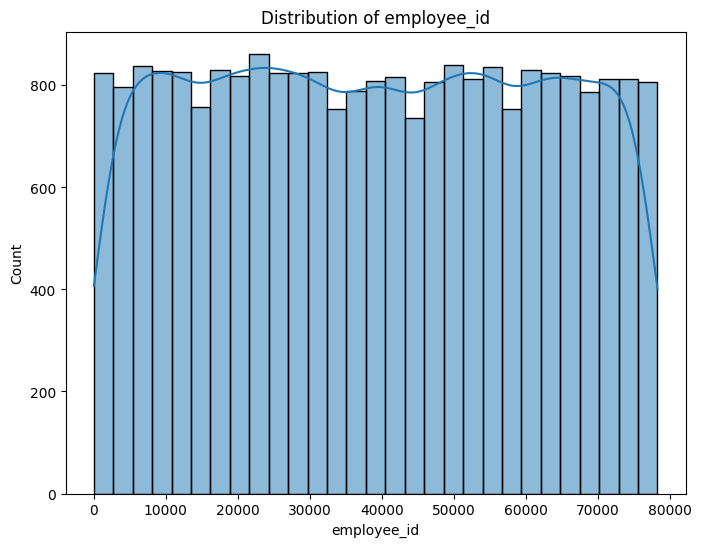

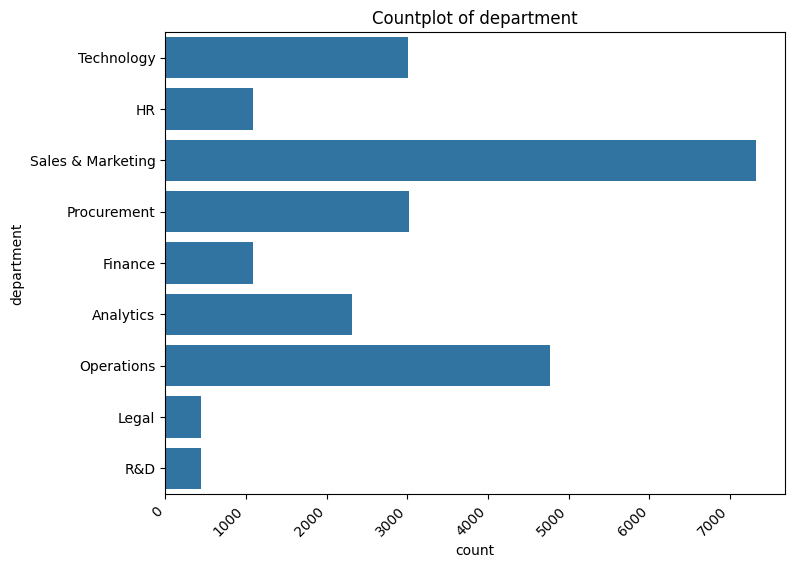

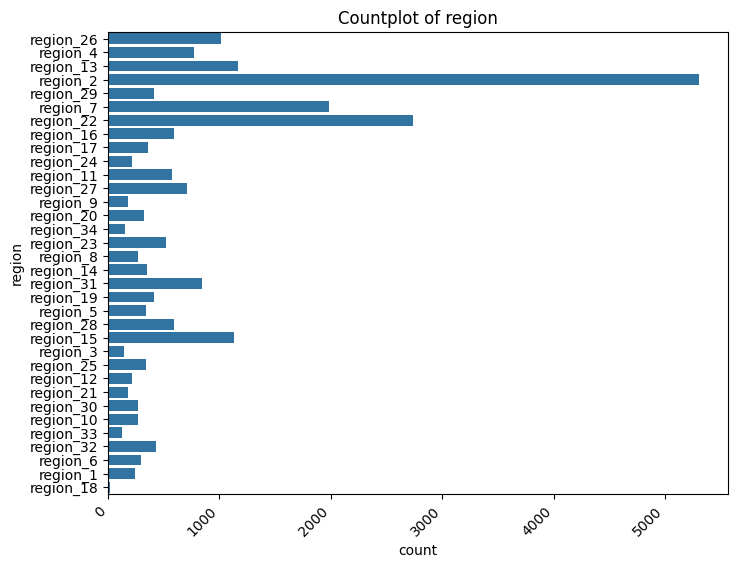

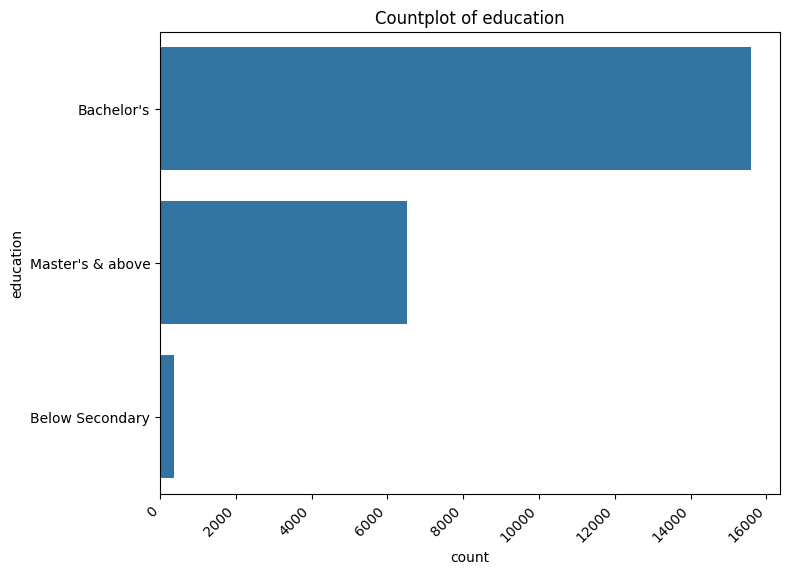

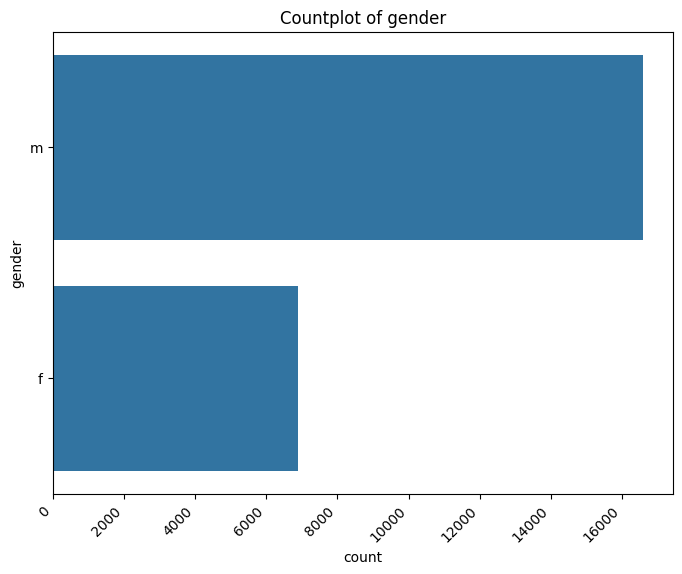

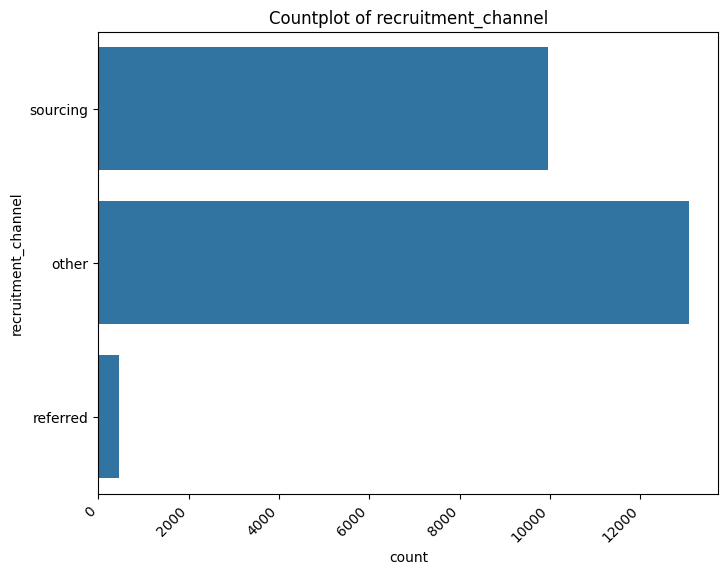

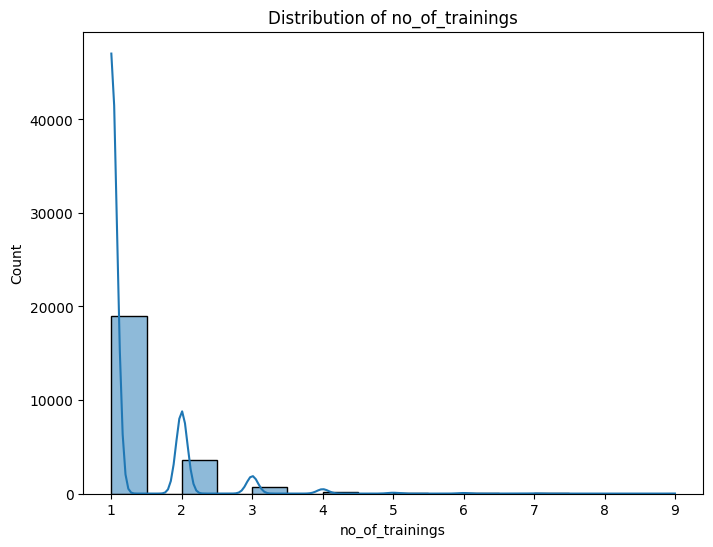

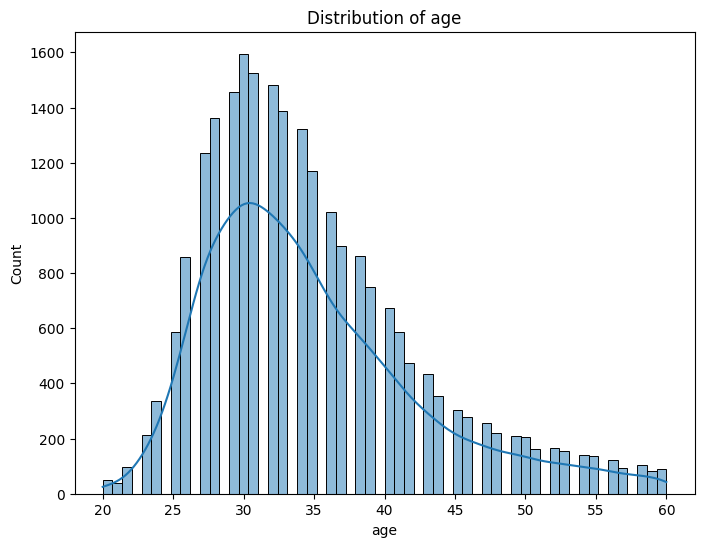

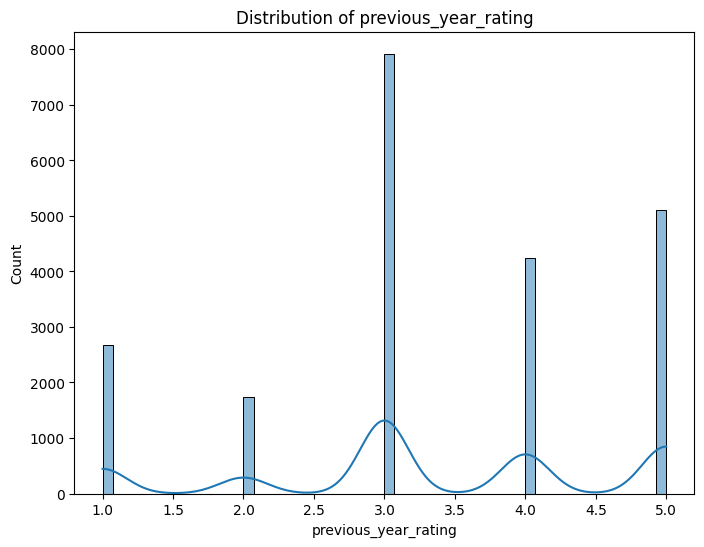

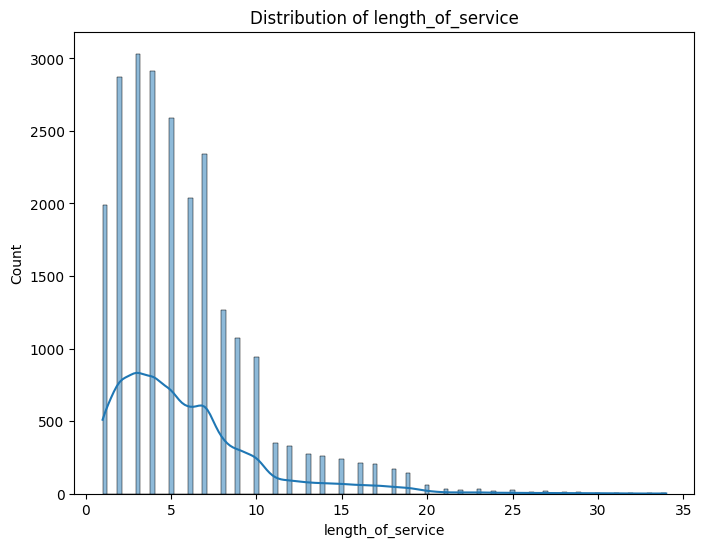

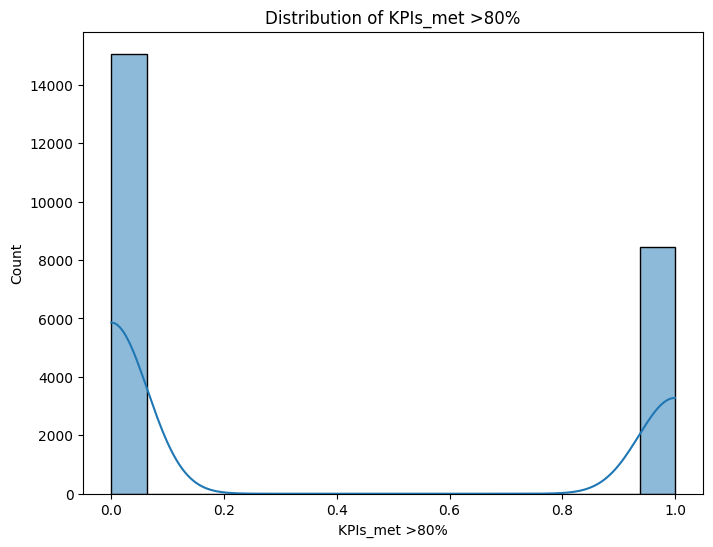

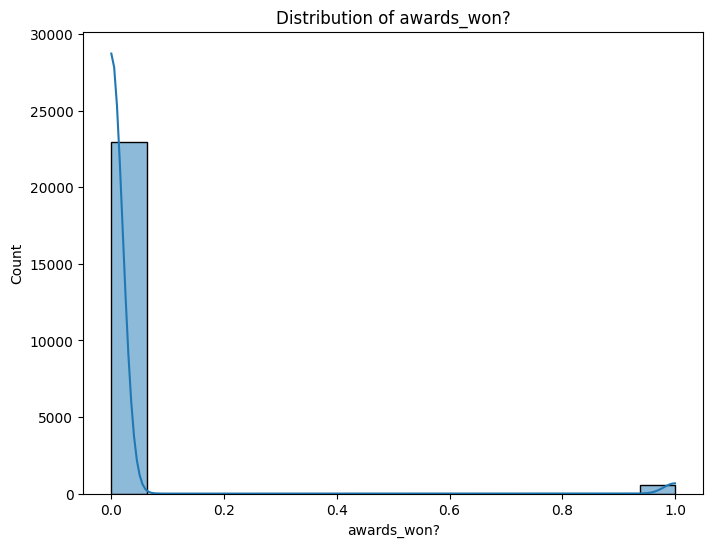

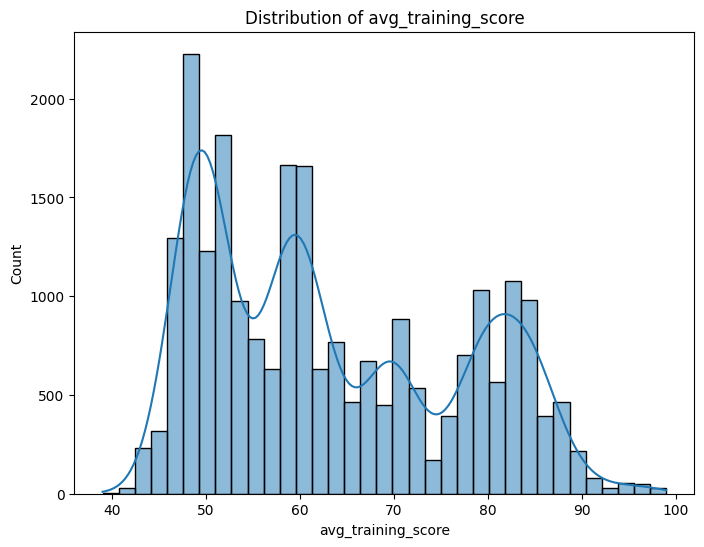

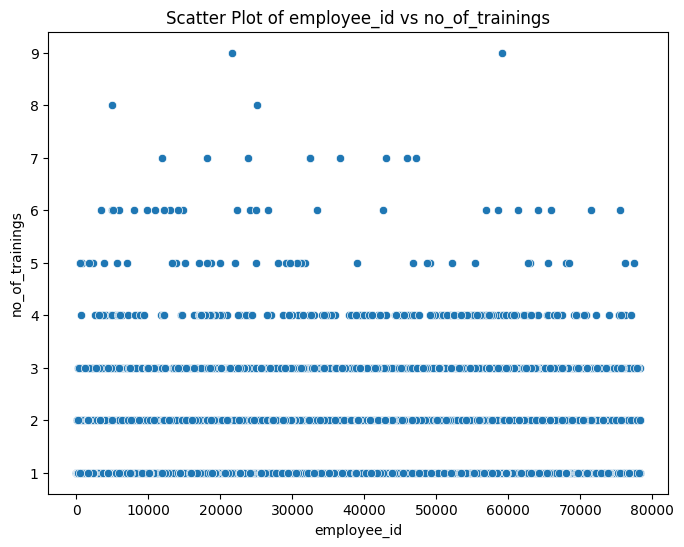

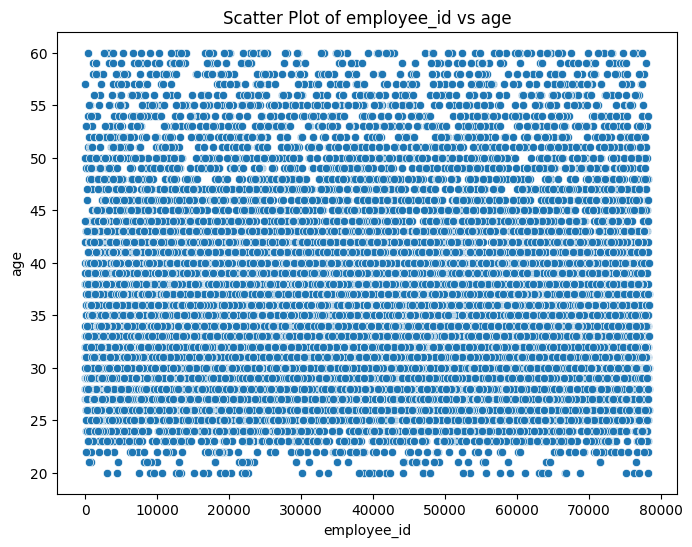

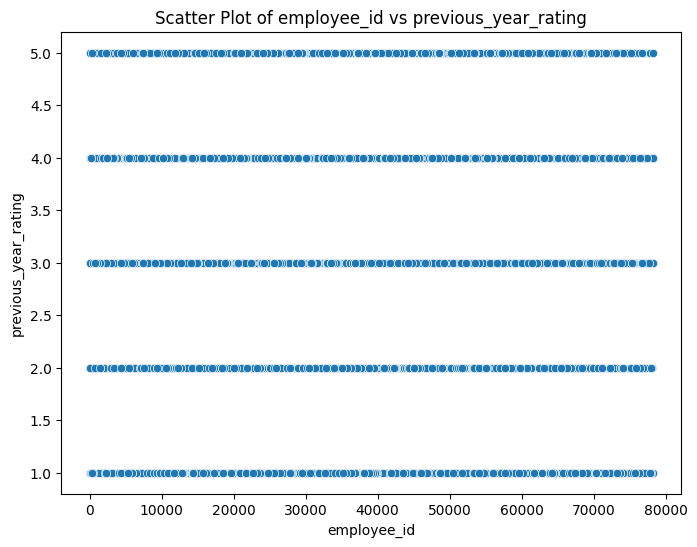

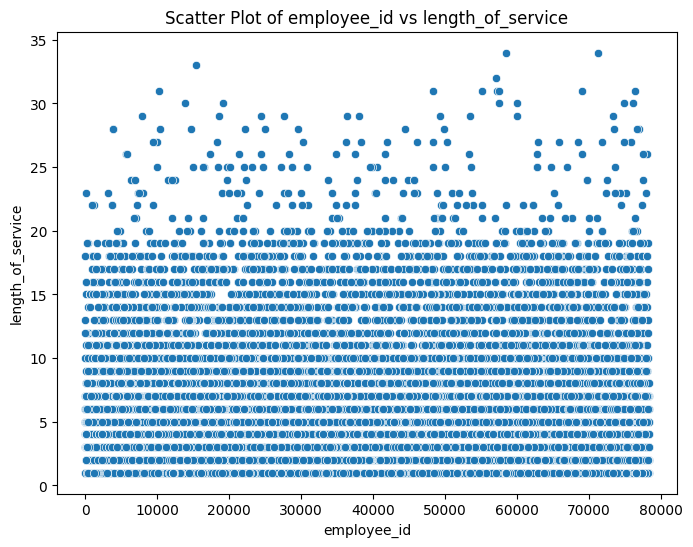

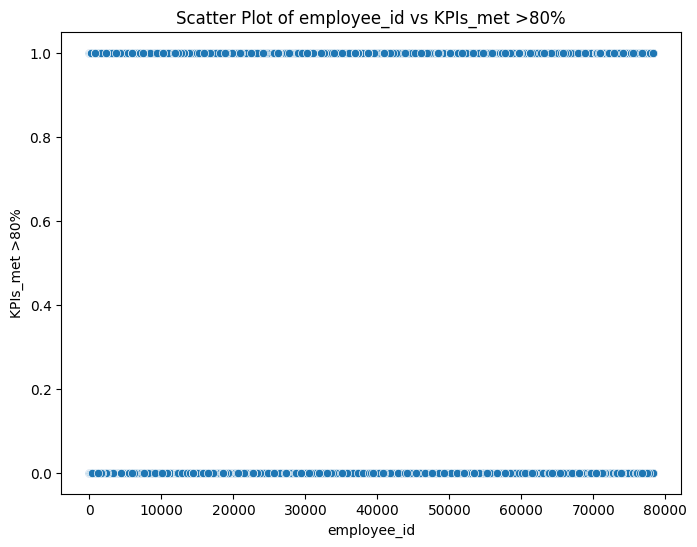

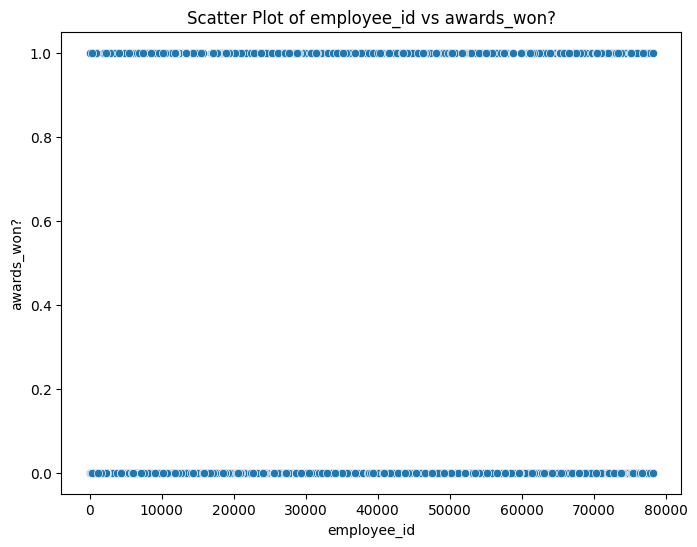

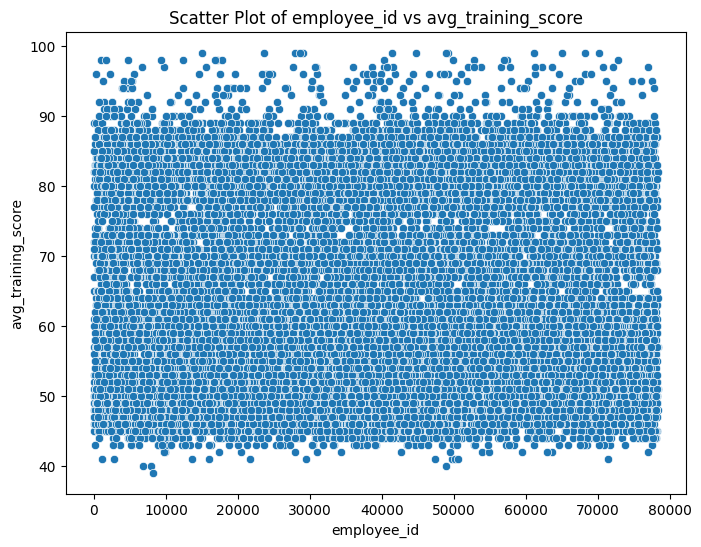

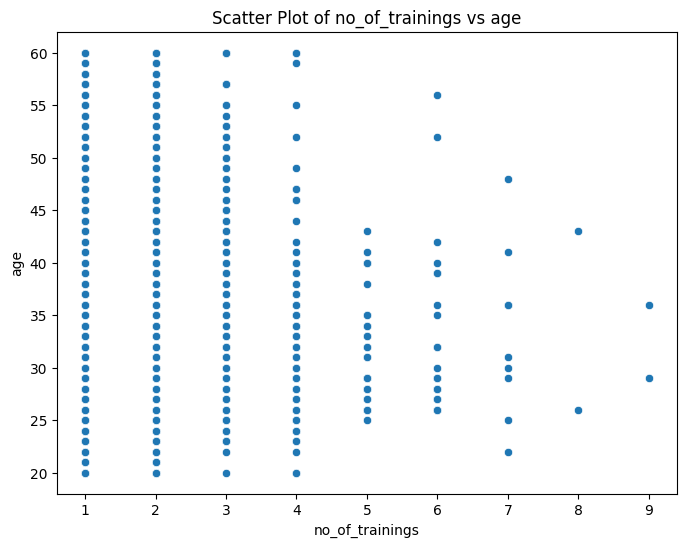

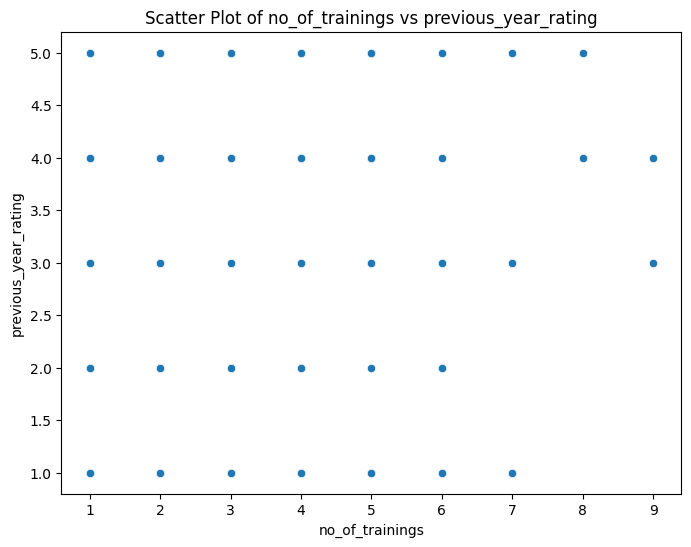

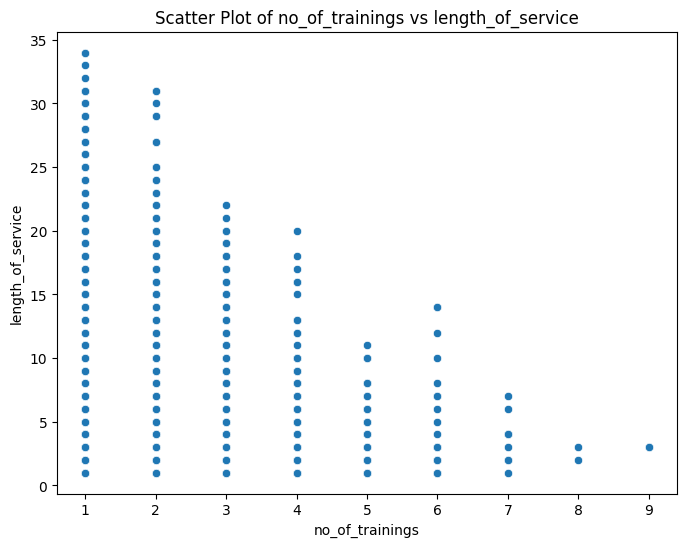

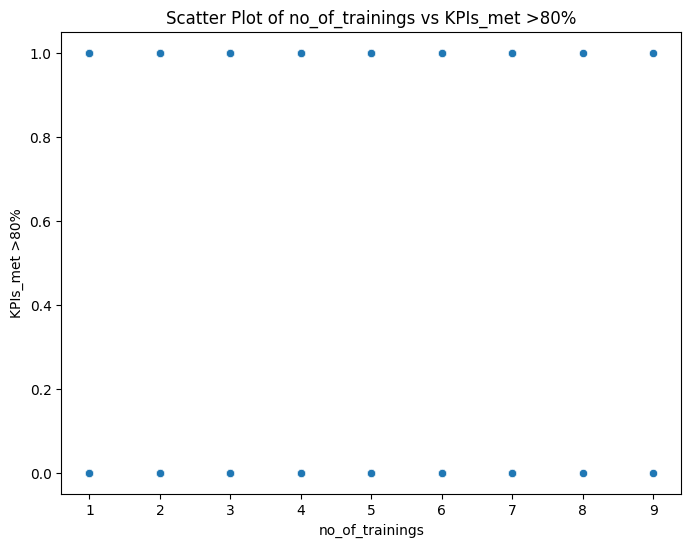

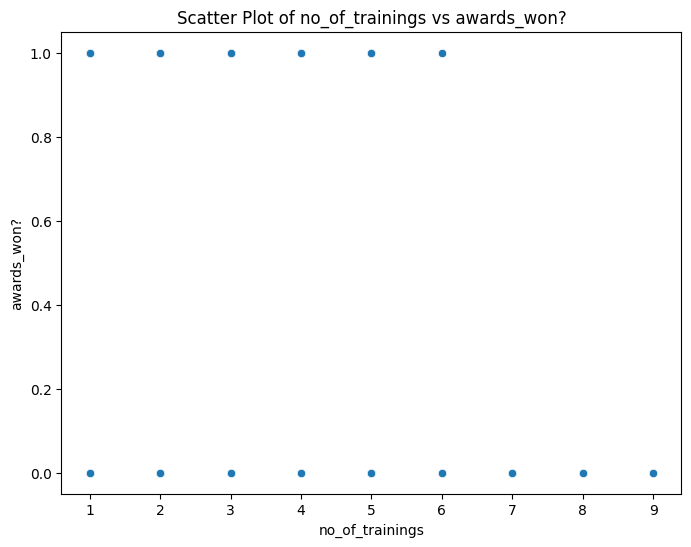

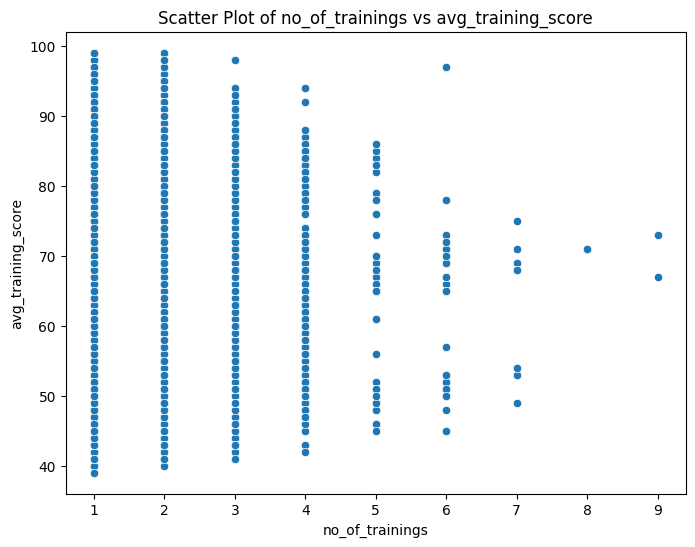

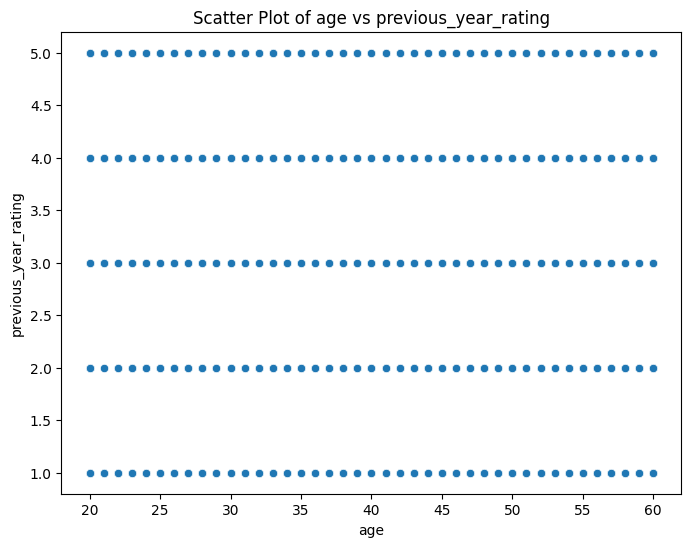

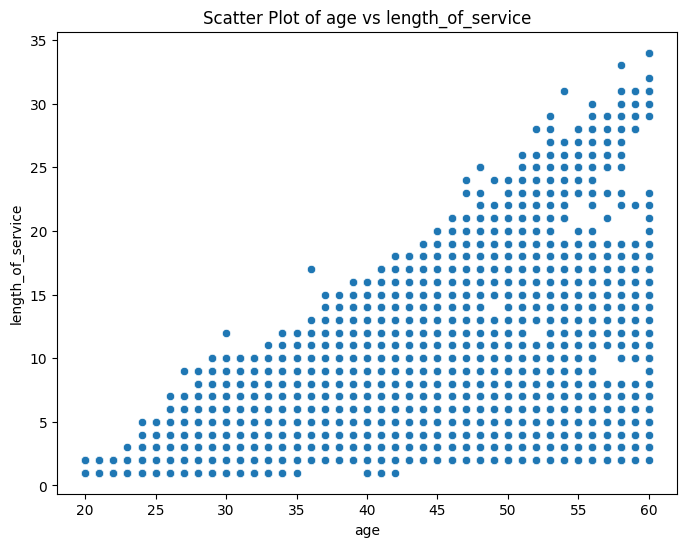

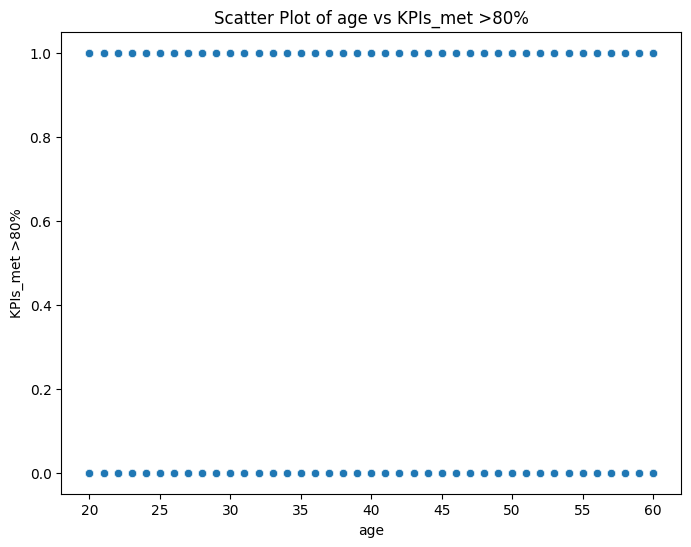

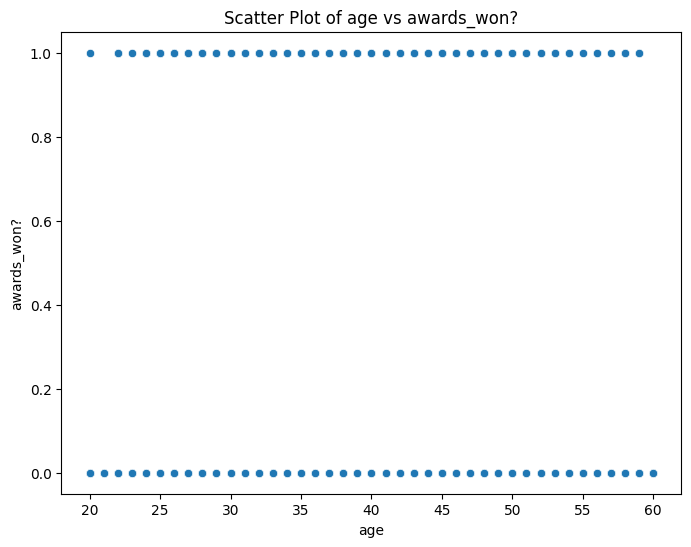

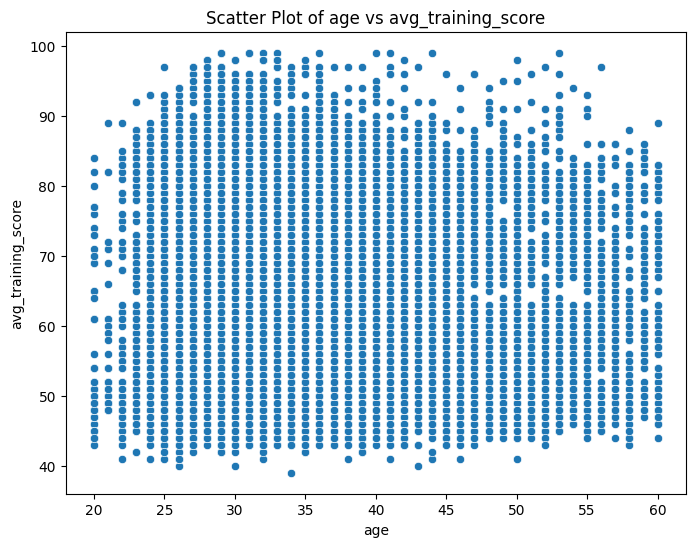

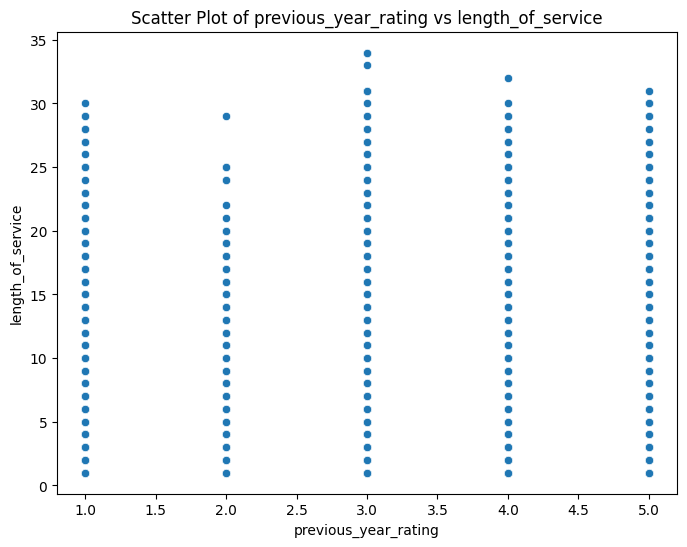

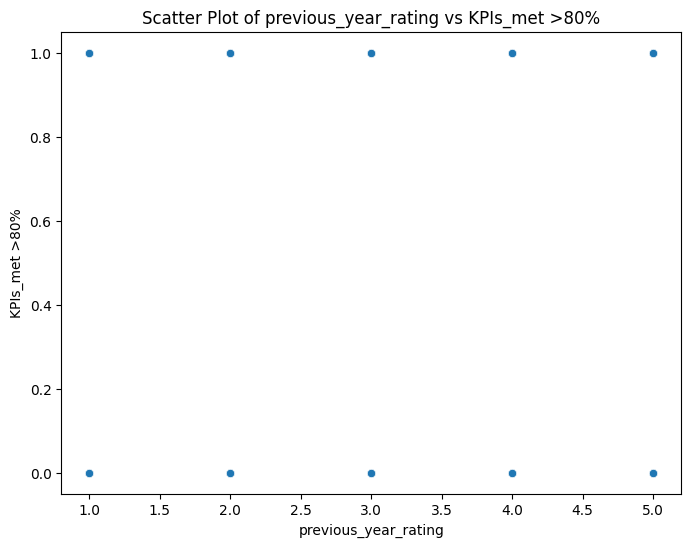

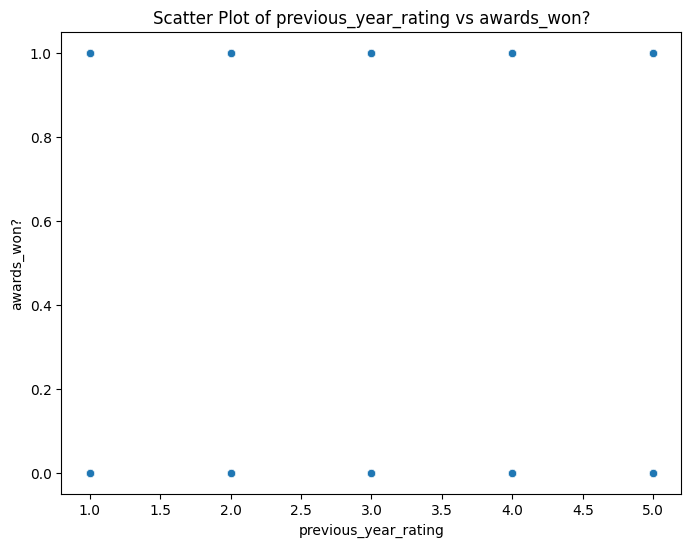

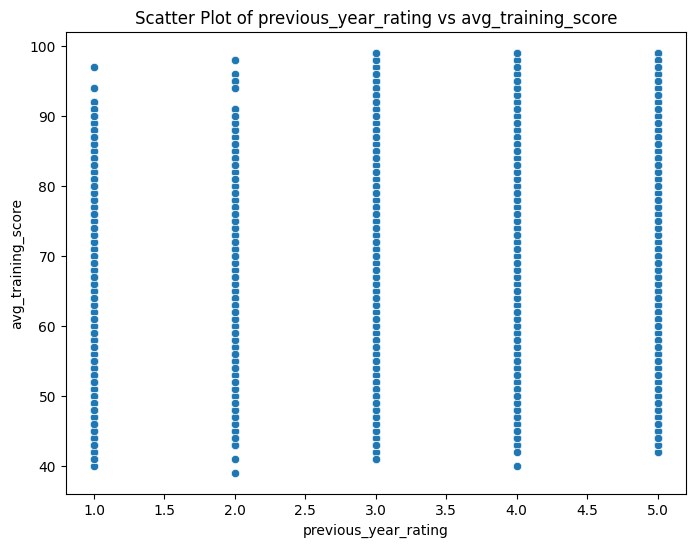

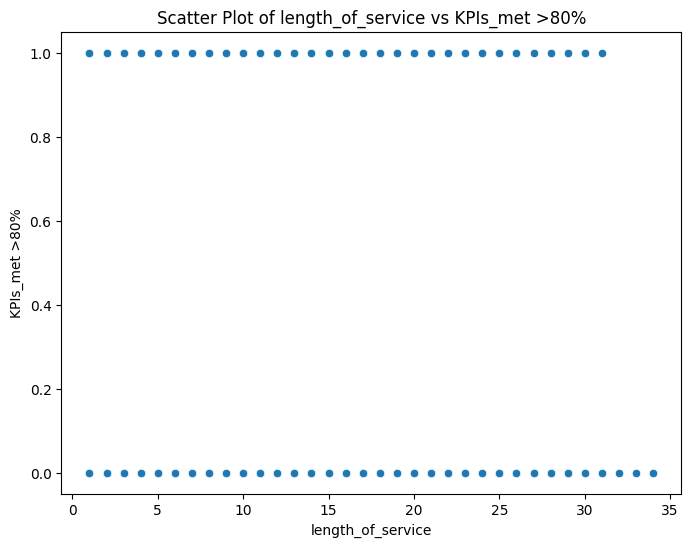

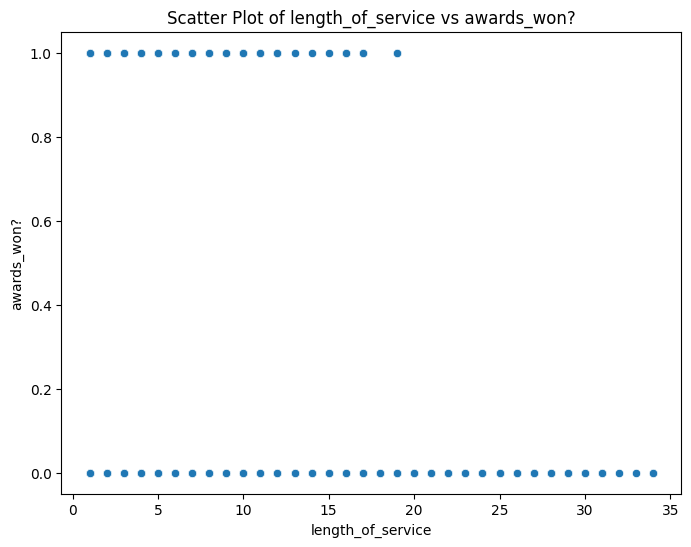

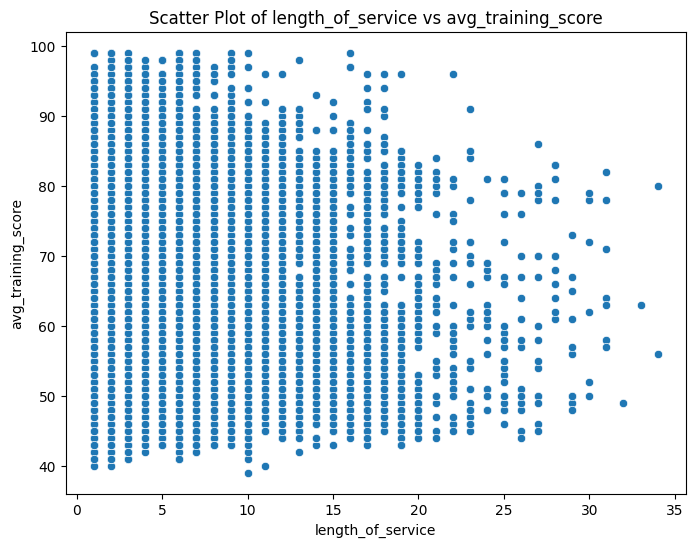

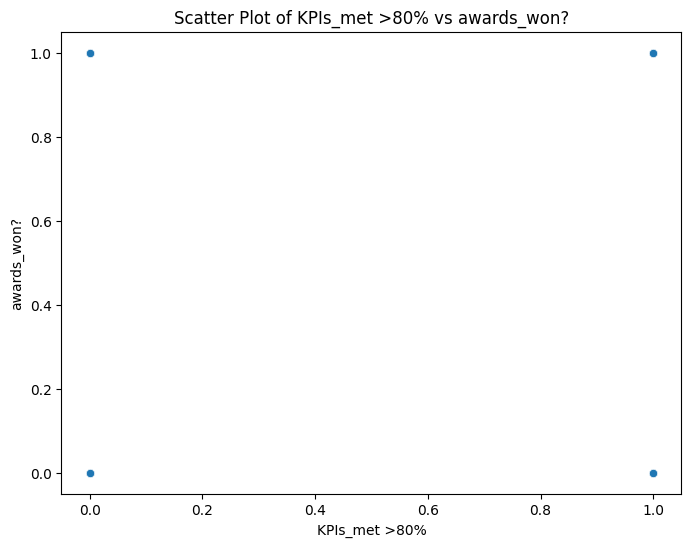

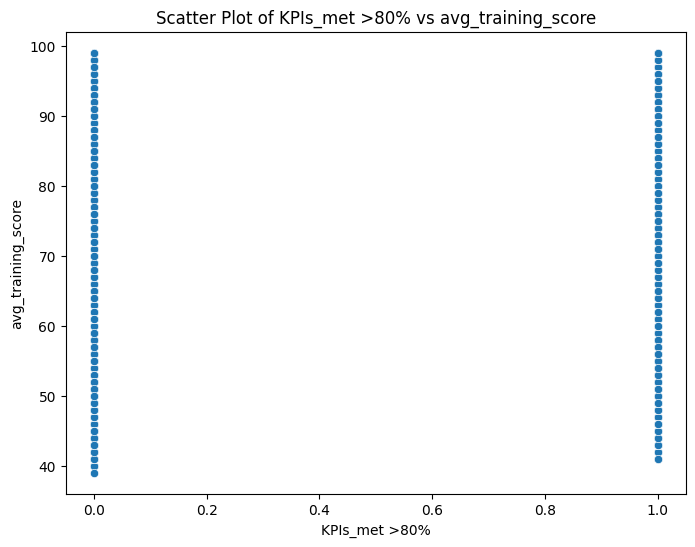

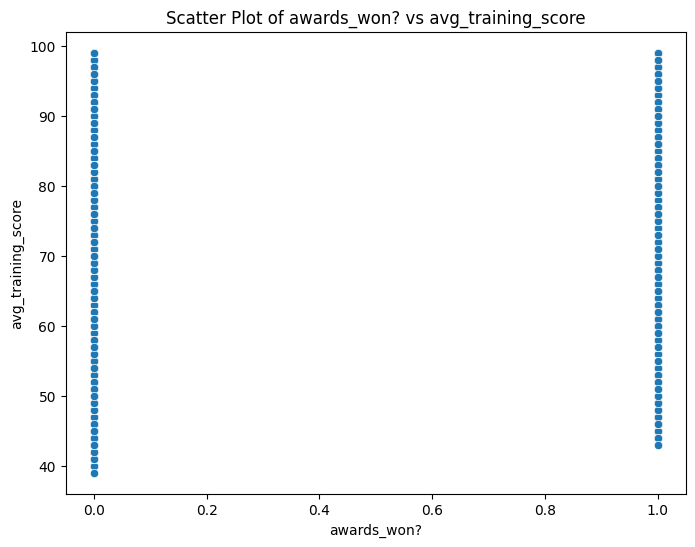

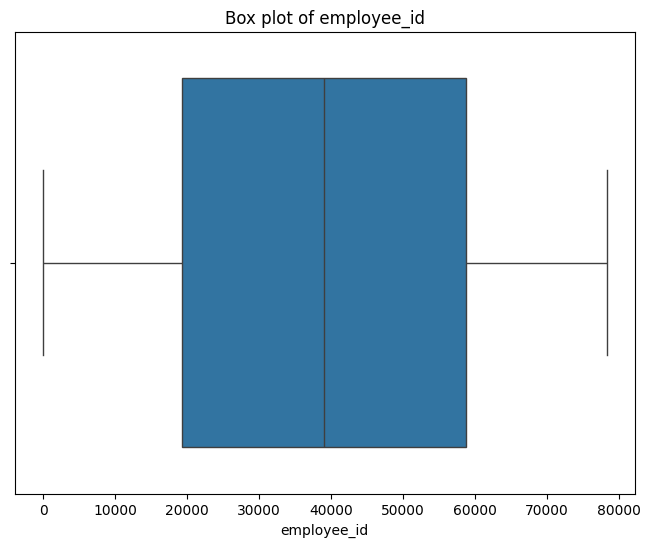

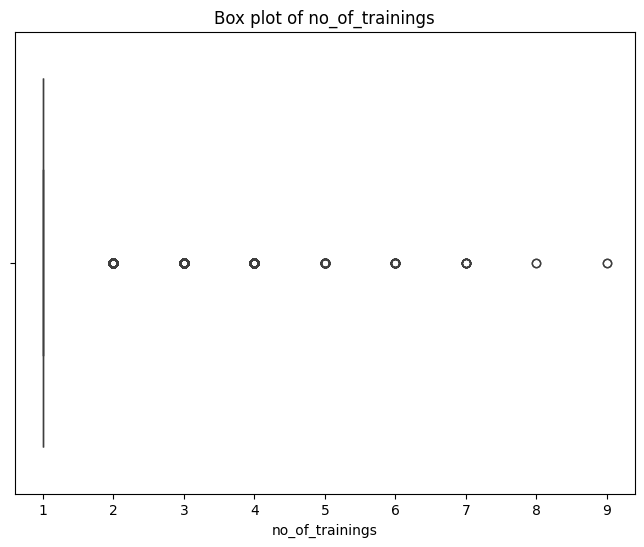

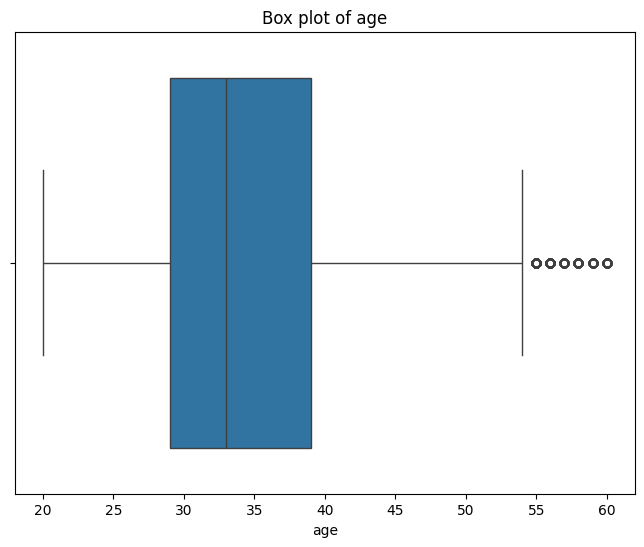

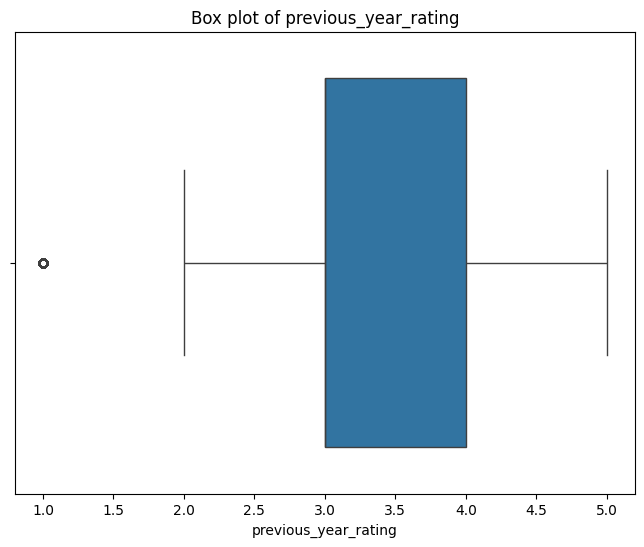

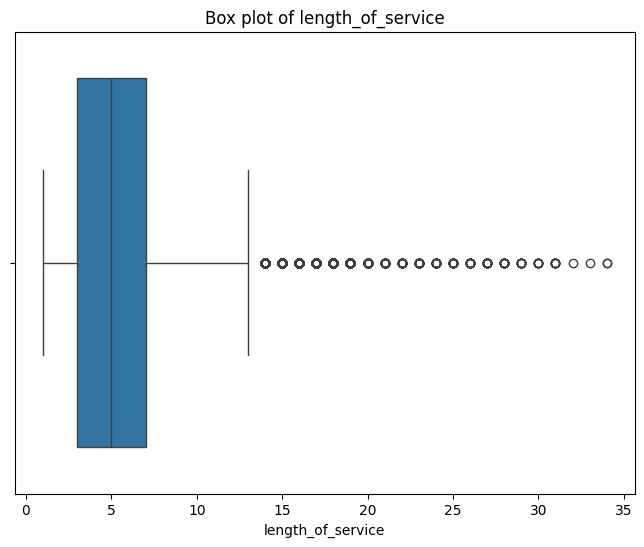

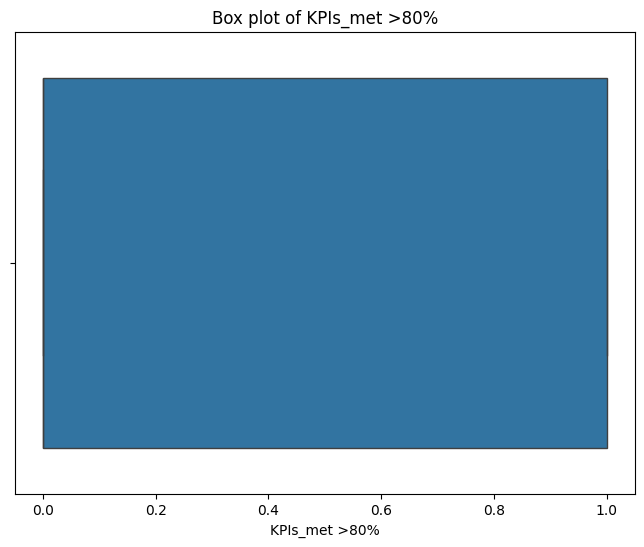

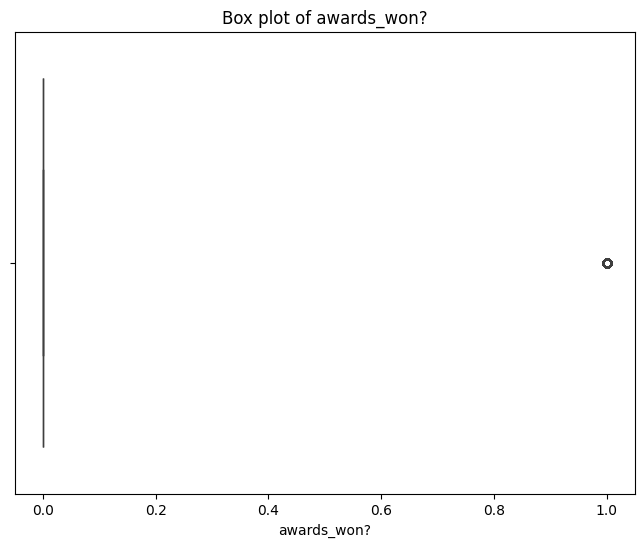

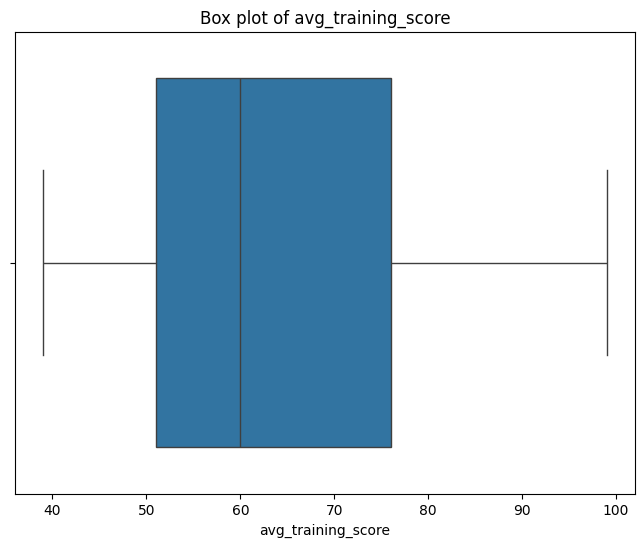

In [2]:
# prompt: Exploratory Data Analysis

# Display basic information about the dataset
print(data1.info())
print(data1.describe())

# Check for missing values
print(data1.isnull().sum())

# Visualize data distributions
for column in data1.columns:
  if pd.api.types.is_numeric_dtype(data1[column]):
    plt.figure(figsize=(8, 6))
    sns.histplot(data1[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()
  else:
    plt.figure(figsize=(8, 6))
    sns.countplot(data1[column])
    plt.title(f'Countplot of {column}')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.show()

# Explore relationships between variables (example with scatter plot for numerical variables)
numerical_cols = data1.select_dtypes(include=np.number).columns
for i in range(len(numerical_cols)):
    for j in range(i+1, len(numerical_cols)):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=data1[numerical_cols[i]], y=data1[numerical_cols[j]])
        plt.title(f'Scatter Plot of {numerical_cols[i]} vs {numerical_cols[j]}')
        plt.show()



# Box plots to visualize the distribution of numerical data and identify outliers
for col in numerical_cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=data1[col])
    plt.title(f"Box plot of {col}")
    plt.show()


In [7]:
# prompt: find  unique values from data1



for col in data1.columns:
  print(f"Unique values in column '{col}':")
  print(data1[col].unique())
  print("-" * 20)

Unique values in column 'employee_id':
[ 8724 74430 72255 ... 45409  1186  5973]
--------------------
Unique values in column 'department':
['Technology' 'HR' 'Sales & Marketing' 'Procurement' 'Finance' 'Analytics'
 'Operations' 'Legal' 'R&D']
--------------------
Unique values in column 'region':
['region_26' 'region_4' 'region_13' 'region_2' 'region_29' 'region_7'
 'region_22' 'region_16' 'region_17' 'region_24' 'region_11' 'region_27'
 'region_9' 'region_20' 'region_34' 'region_23' 'region_8' 'region_14'
 'region_31' 'region_19' 'region_5' 'region_28' 'region_15' 'region_3'
 'region_25' 'region_12' 'region_21' 'region_30' 'region_10' 'region_33'
 'region_32' 'region_6' 'region_1' 'region_18']
--------------------
Unique values in column 'education':
["Bachelor's" "Master's & above" nan 'Below Secondary']
--------------------
Unique values in column 'gender':
['m' 'f']
--------------------
Unique values in column 'recruitment_channel':
['sourcing' 'other' 'referred']
----------------

In [8]:
# prompt: colourful histogram of KPI_met , previous_year_rating, no_of_trainings grouped by avg_training_score

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data1' DataFrame is already loaded as in the previous code

# Group data by 'avg_training_score'
grouped_data = data1.groupby('avg_training_score')

# Create the colorful histogram
plt.figure(figsize=(12, 8))  # Adjust figure size as needed

for column in ['KPI_met', 'previous_year_rating', 'no_of_trainings']:
    sns.histplot(data=data1, x=column, hue='avg_training_score', multiple='stack', palette='viridis', alpha=0.7) #'stack' for stacked histograms
    plt.title(f'Histogram of {column} grouped by avg_training_score')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

ValueError: Could not interpret value `KPI_met` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x800 with 0 Axes>

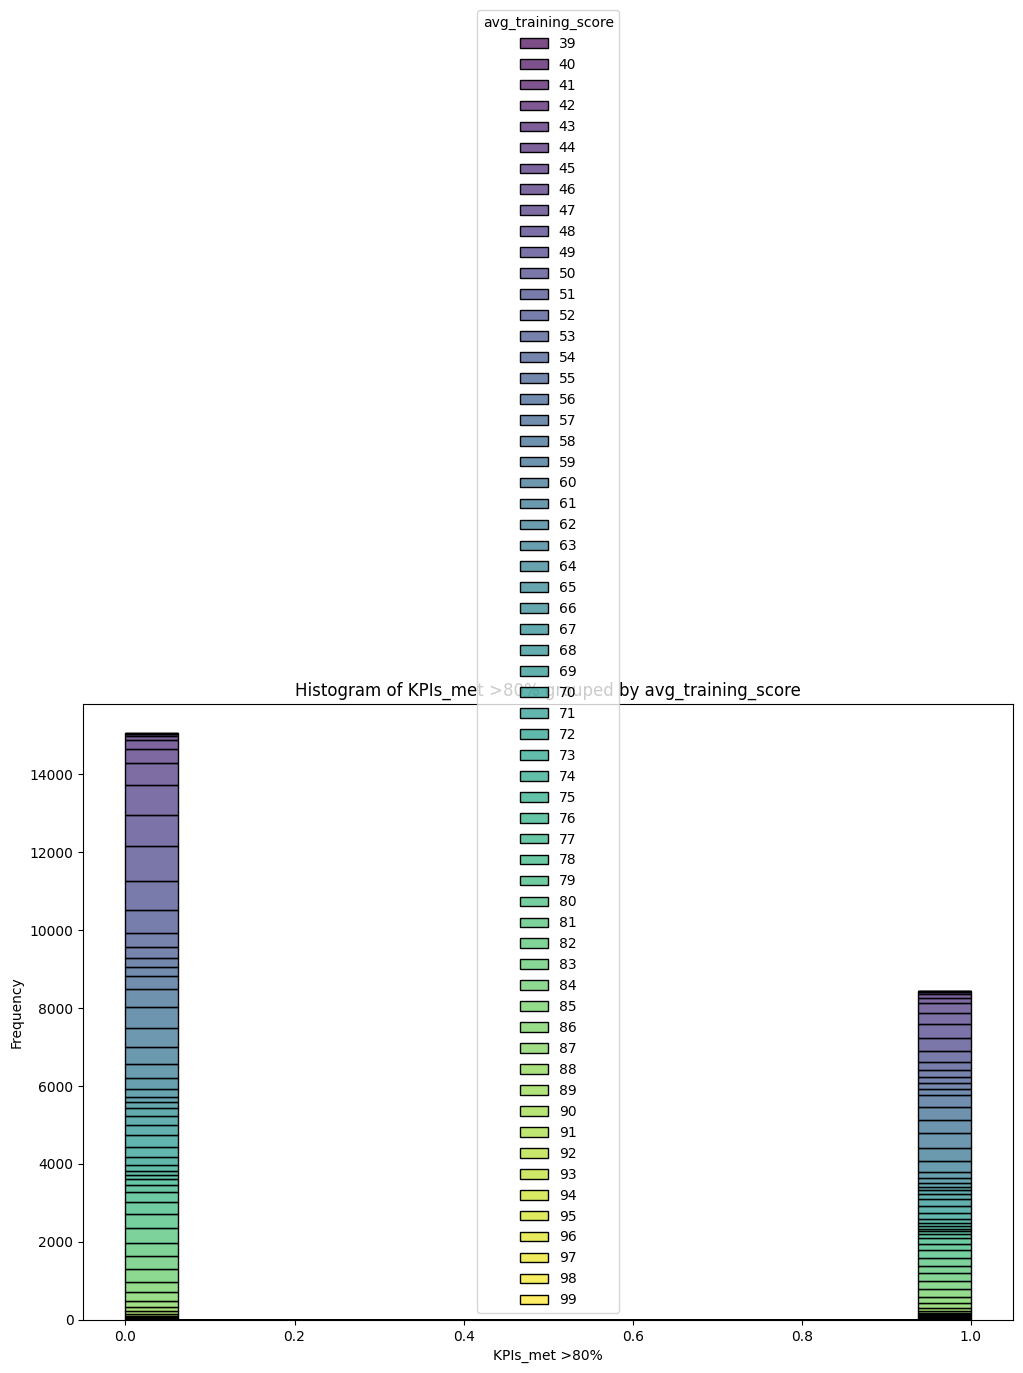

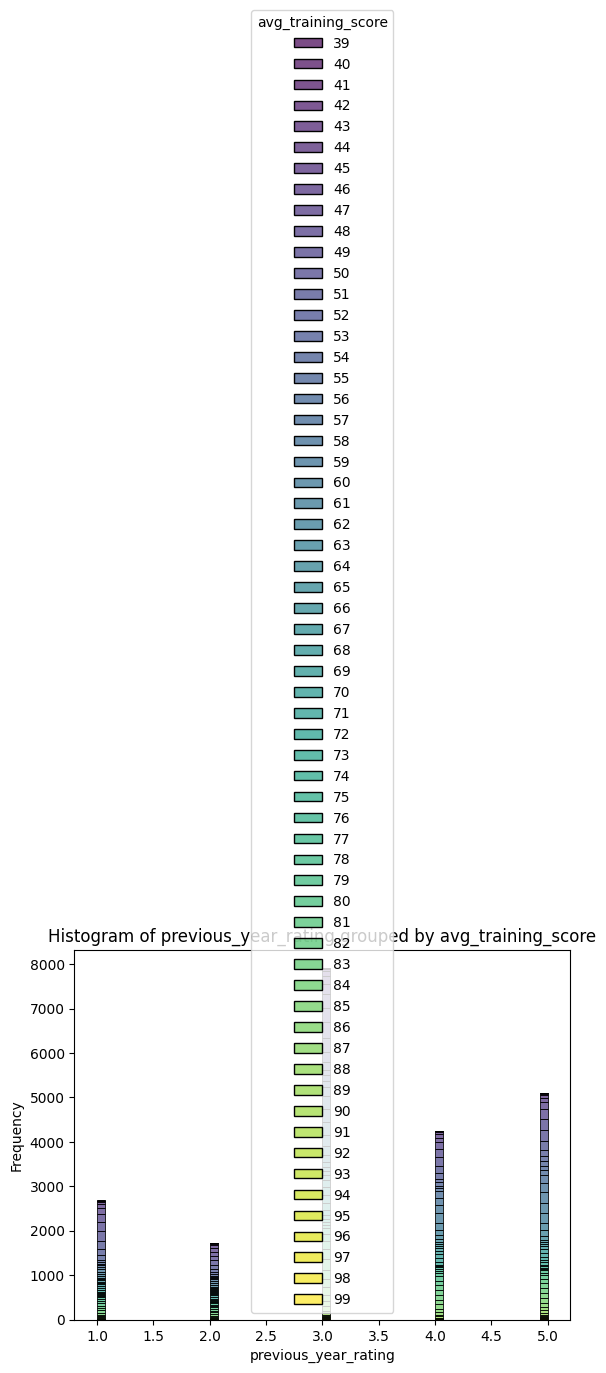

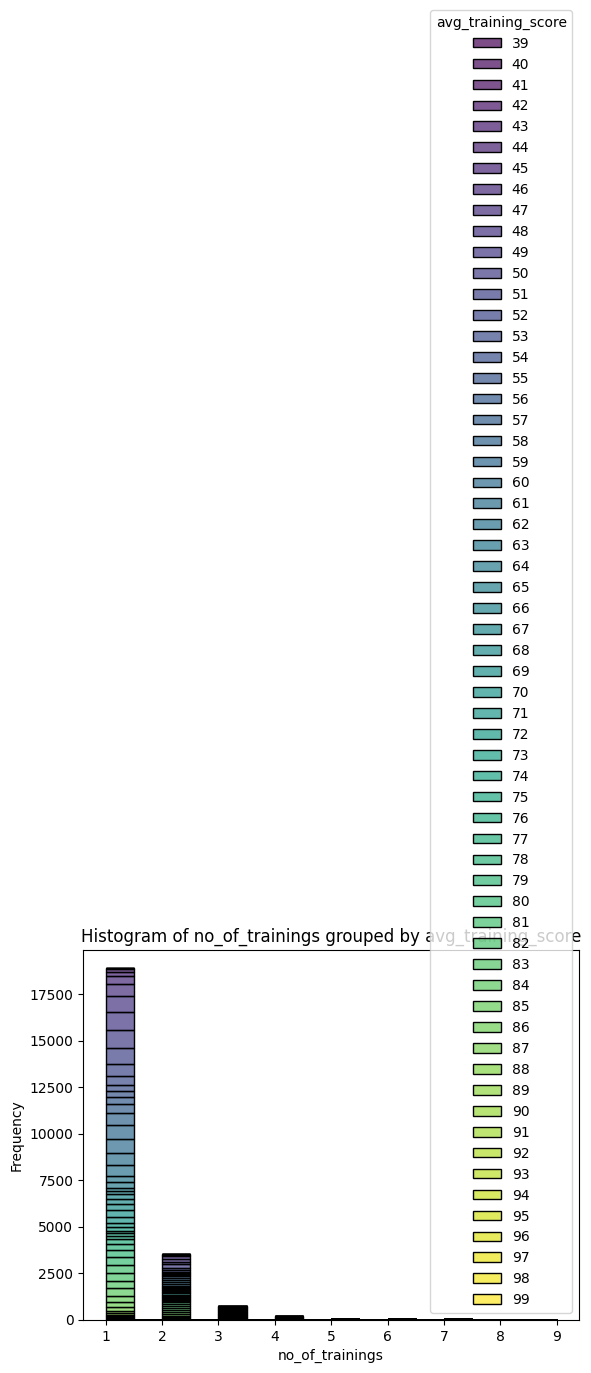

In [9]:
# prompt: colourful histogram of KPI_met , previous_year_rating, no_of_trainings grouped by avg_training_score

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data1' DataFrame is already loaded as in the previous code

# Group data by 'avg_training_score'
grouped_data = data1.groupby('avg_training_score')

# Create the colorful histogram
plt.figure(figsize=(12, 8))  # Adjust figure size as needed

# Changed 'KPI_met' to 'KPIs_met >80%' to match the actual column name
for column in ['KPIs_met >80%', 'previous_year_rating', 'no_of_trainings']:
    sns.histplot(data=data1, x=column, hue='avg_training_score', multiple='stack', palette='viridis', alpha=0.7) #'stack' for stacked histograms
    plt.title(f'Histogram of {column} grouped by avg_training_score')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


<ipython-input-10-3e790981b359>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i], x='avg_training_score', y=column, data=data1, palette='viridis')
<ipython-input-10-3e790981b359>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i], x='avg_training_score', y=column, data=data1, palette='viridis')
<ipython-input-10-3e790981b359>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i], x='avg_training_score', y=column, data=data1, palette='viridis')


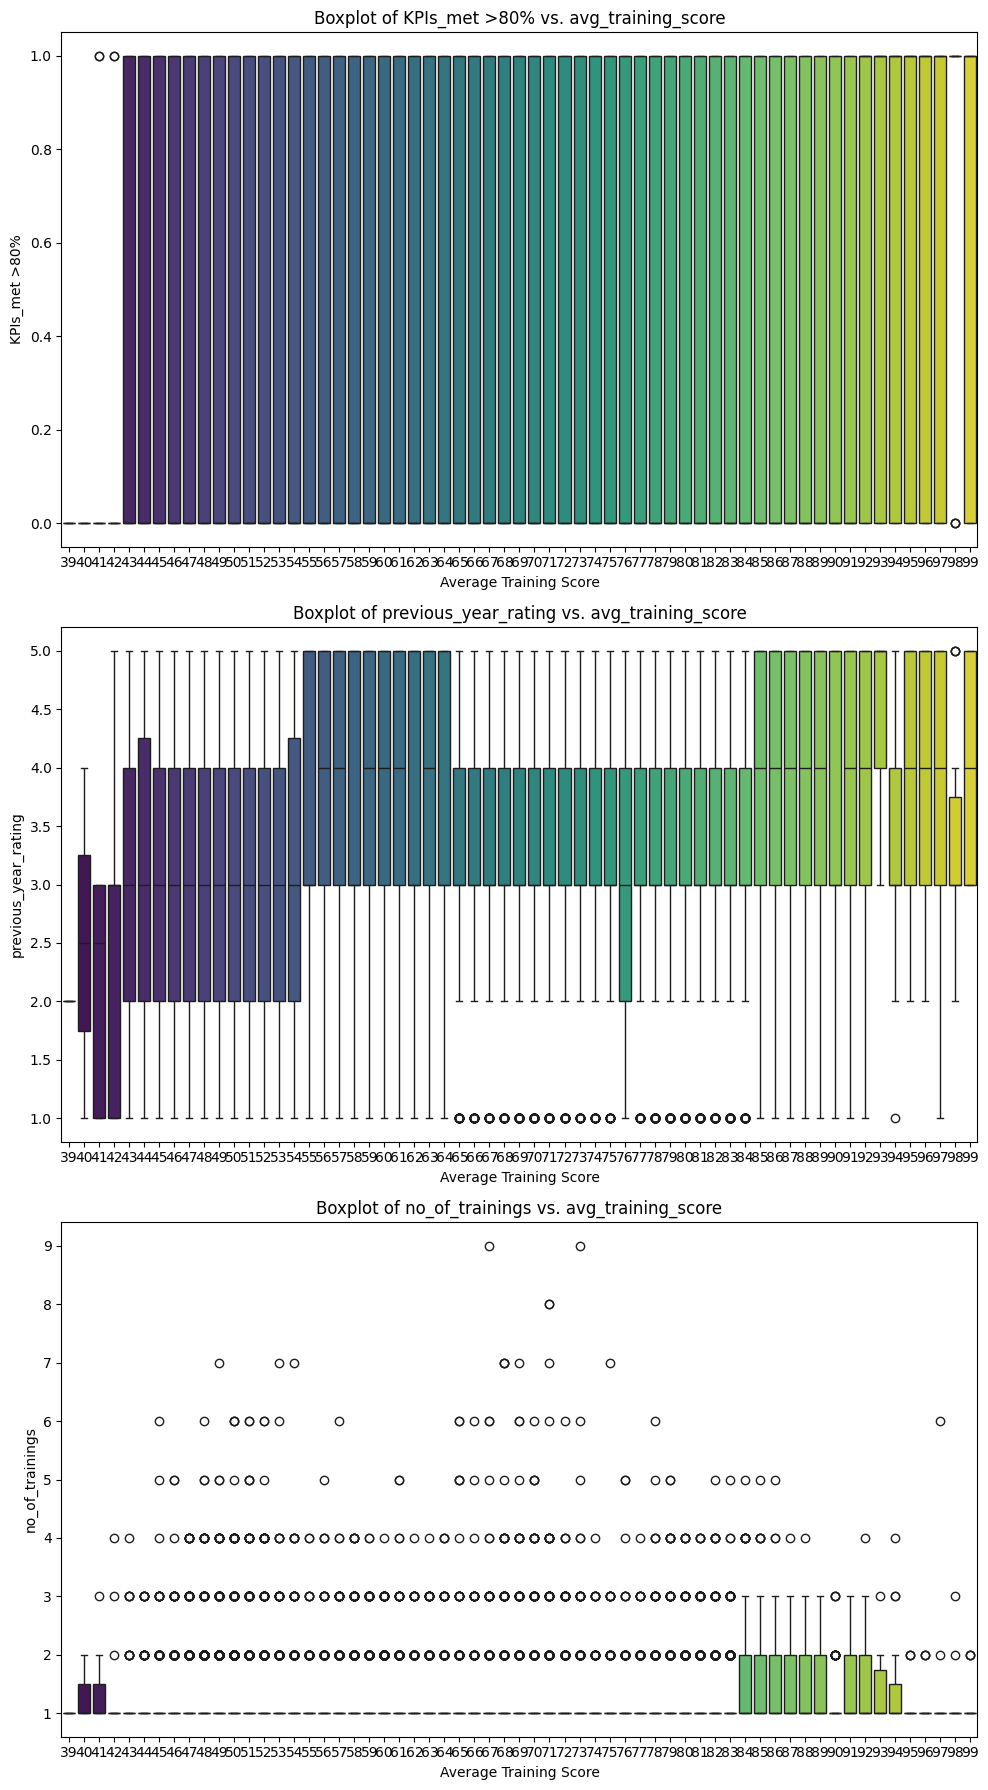

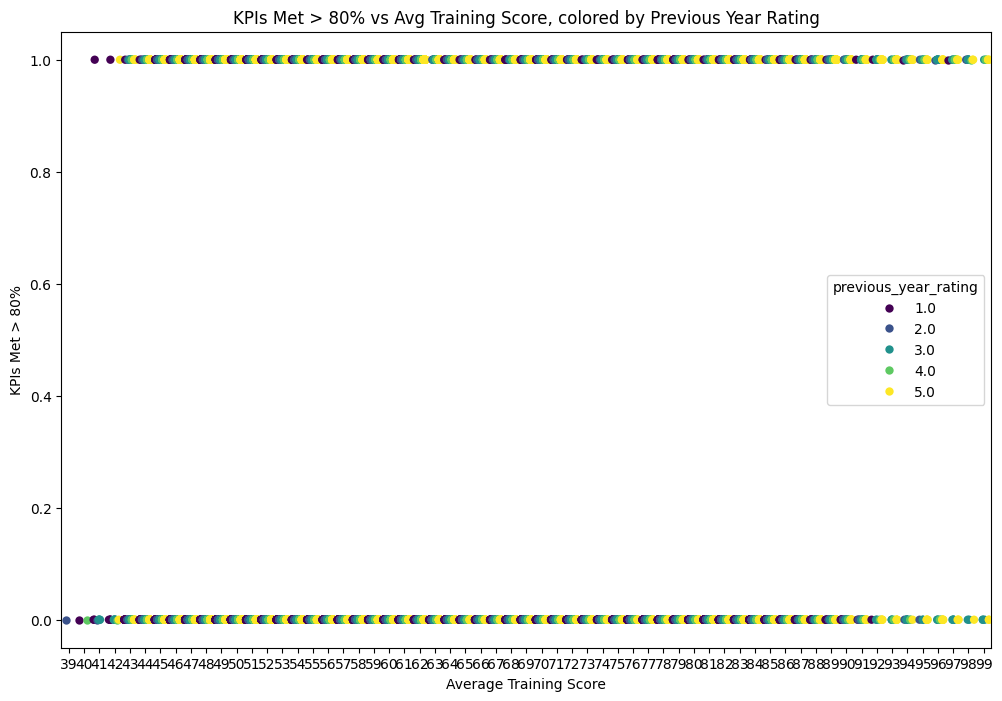

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 50.0% of the points cannot be plac

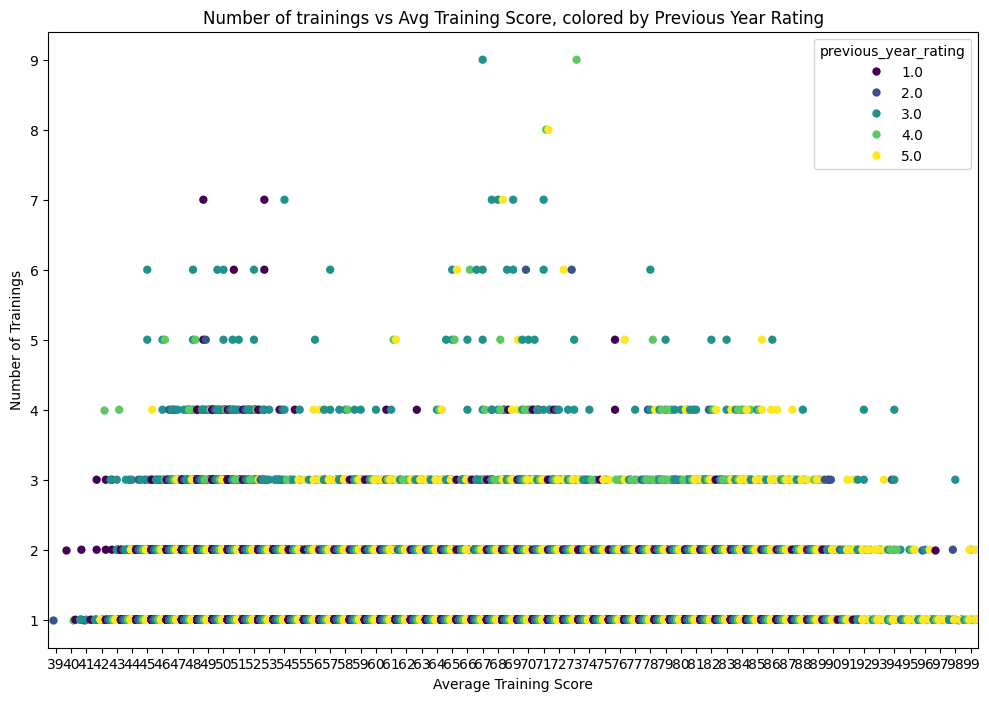

In [10]:
# plot values from  KPI_met , previous_year_rating, no_of_trainings grouped by avg_training_score

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data1' DataFrame is already loaded

# Group data by 'avg_training_score'
grouped_data = data1.groupby('avg_training_score')

# Define a list of columns to plot
columns_to_plot = ['KPIs_met >80%', 'previous_year_rating', 'no_of_trainings']


# Create subplots for each column
fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(10, 6 * len(columns_to_plot)))

for i, column in enumerate(columns_to_plot):
    # Create a boxplot for the current column
    sns.boxplot(ax=axes[i], x='avg_training_score', y=column, data=data1, palette='viridis')

    axes[i].set_title(f'Boxplot of {column} vs. avg_training_score')
    axes[i].set_xlabel('Average Training Score')
    axes[i].set_ylabel(column)


plt.tight_layout()
plt.show()


#Alternative plot using stripplot
plt.figure(figsize=(12, 8))
sns.stripplot(x='avg_training_score', y='KPIs_met >80%', hue='previous_year_rating', data=data1, palette='viridis', dodge=True, jitter=0.3, size=6)
plt.title('KPIs Met > 80% vs Avg Training Score, colored by Previous Year Rating')
plt.xlabel('Average Training Score')
plt.ylabel('KPIs Met > 80%')
plt.show()


#Another alternative plot using swarmplot

plt.figure(figsize=(12, 8))
sns.swarmplot(x='avg_training_score', y='no_of_trainings', hue='previous_year_rating', data=data1, palette='viridis', dodge=True, size=6)
plt.title('Number of trainings vs Avg Training Score, colored by Previous Year Rating')
plt.xlabel('Average Training Score')
plt.ylabel('Number of Trainings')
plt.show()

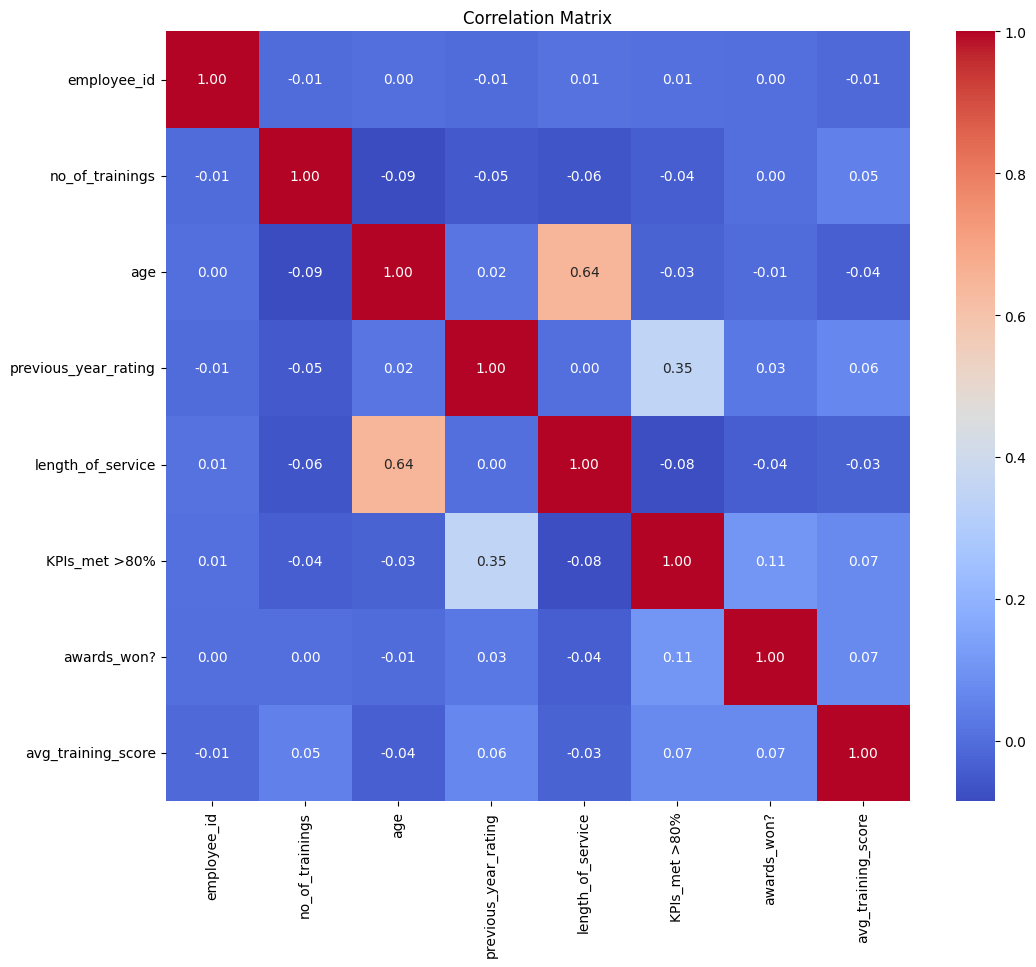

In [3]:
# Calculate and visualize the correlation matrix
# Select only numeric columns for correlation calculation
numerical_data = data1.select_dtypes(include=np.number)
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



# Key Factors and Correlations:

## 1. KPIs_met >80%:  Higher proportions of KPIs met above 80% are associated with higher average training scores.  The relationship seems to be positive, with more KPIs met correlating with higher training scores.

## 2. previous_year_rating:  Employees with higher previous year ratings tend to have higher average training scores.  There's a noticeable positive trend.  This suggests that past performance is a strong predictor of training success.

## 3. no_of_trainings: The relationship between the number of trainings and average training score is less clear-cut.  Some plots indicate a slight positive correlation, suggesting that more training might lead to higher scores, but this isn't as strong as the previous two factors. It's possible that the type or quality of training matters more than quantity.

## 4. Correlation Matrix:  The correlation matrix provides numerical insights into the linear relationships.  Look for values close to +1 or -1 for strong positive and negative correlations, respectively. The matrix would quantify the relationships identified in the visualizations.

## Recommendations for increasing avg_training_score:

## 1. Focus on improving KPI performance:  Encourage and support employees to consistently meet KPIs at or above 80%.  Target interventions for those consistently underperforming.

## 2. Consider previous year's ratings:  Direct training resources and strategies towards employees with lower previous year ratings. This could include more focused training, mentorship, or additional support.

## 3. Evaluate the effectiveness of trainings:  It's important to examine *how* the trainings are impacting scores.  The number of trainings alone might not be sufficient. Determine if different types of training have varying degrees of effectiveness.  Consider training quality and relevance as potential improvements.  The plots showing `no_of_trainings` seem to indicate that more training opportunities may not always translate to better avg scores. The current data shows that higher avg scores are achieved with lower amounts of training.

## 4. Further investigation:  Explore other factors not directly analyzed in the code (e.g., employee demographics, department, roles).  These could be correlated with training outcomes and further inform strategies.

In [5]:
# prompt: columns names

print(data1.columns)
print(data1.columns.tolist())

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')
['employee_id', 'department', 'region', 'education', 'gender', 'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']


In [11]:
# prompt: mean values of 'previous_year_rating' [avg_training_score & 'KPIs_met

# Calculate mean values of 'previous_year_rating' grouped by 'avg_training_score' and 'KPIs_met >80%'
mean_values = data1.groupby(['avg_training_score', 'KPIs_met >80%'])['previous_year_rating'].mean()
mean_values

avg_training_score  KPIs_met >80%
39                  0                2.000000
40                  0                2.500000
41                  0                2.285714
                    1                1.000000
42                  0                2.583333
                                       ...   
97                  1                3.714286
98                  0                3.666667
                    1                3.272727
99                  0                3.800000
                    1                4.333333
Name: previous_year_rating, Length: 120, dtype: float64

In [20]:
#  set of employees based on recommendations/ past performance Selected employees go through the separate training and evaluation program



selected_employees = data1[(data1['avg_training_score'] >=90) & (data1['previous_year_rating'] >= 4)]

print(f"Number of selected employees: {len(selected_employees)}")
print(f"Selected Employees IDs: {selected_employees}")



Number of selected employees: 153
Selected Employees IDs:        employee_id   department     region         education gender  \
40           41432    Analytics  region_26        Bachelor's      m   
78           10732    Analytics   region_2        Bachelor's      m   
262          70734  Procurement  region_15        Bachelor's      m   
350          39224   Technology  region_27        Bachelor's      m   
439          21160   Technology  region_26        Bachelor's      m   
...            ...          ...        ...               ...    ...   
22470         1214   Technology  region_27        Bachelor's      m   
22730        70488      Finance  region_22        Bachelor's      m   
23170        77835    Analytics   region_2        Bachelor's      m   
23188        35139           HR   region_7  Master's & above      f   
23387        29019    Analytics  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
40              

In [22]:


# A new DataFrame containing only selected employees with higher chances of promotion
selected_employees_data = data1[data1.index.isin(selected_employees.index)]

# Display the resulting DataFrame
selected_employees_data

employee_id   department     region         education gender  \
40           41432    Analytics  region_26        Bachelor's      m   
78           10732    Analytics   region_2        Bachelor's      m   
262          70734  Procurement  region_15        Bachelor's      m   
350          39224   Technology  region_27        Bachelor's      m   
439          21160   Technology  region_26        Bachelor's      m   
...            ...          ...        ...               ...    ...   
22470         1214   Technology  region_27        Bachelor's      m   
22730        70488      Finance  region_22        Bachelor's      m   
23170        77835    Analytics   region_2        Bachelor's      m   
23188        35139           HR   region_7  Master's & above      f   
23387        29019    Analytics  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
40               sourcing                1   26                   5.0   
78                  other                1   31                   5.0   
262                 other                1   38                   4.0   
350                 other                1   28                   5.0   
439              sourcing                1   26                   5.0   
...                   ...              ...  ...                   ...   
22470               other                1   33                   5.0   
22730            sourcing                1   28                   5.0   
23170               other                2   48                   5.0   
23188            sourcing                1   34                   5.0   
23387               other                3   28                   5.0   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  
40                     4              1            0                  90  
78                     5              1            0                  92  
262                    2              1            1                  97  
350                    2              0            1                  95  
439                    4              1            0                  94  
...                  ...            ...          ...                 ...  
22470                  7              1            0                  95  
22730                  3              1            0                  91  
23170                  9              1            0                  90  
23188                  6              1            1                  95  
23387                  3              0            0                  91  

[153 rows x 13 columns]

<ipython-input-23-0205b752821e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="department", data=selected_employees_data, palette="viridis")


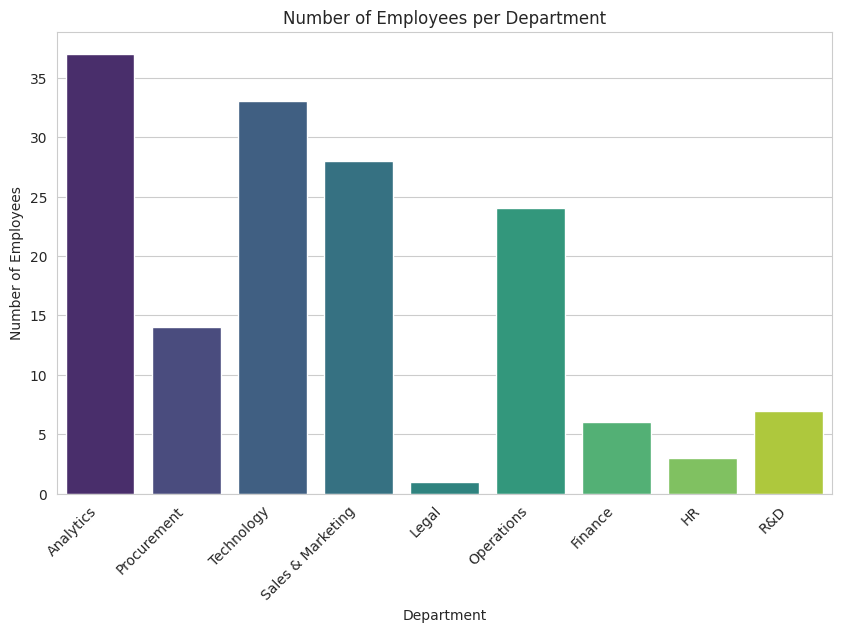

<ipython-input-23-0205b752821e>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="department", y="avg_training_score", data=selected_employees_data, palette="magma")


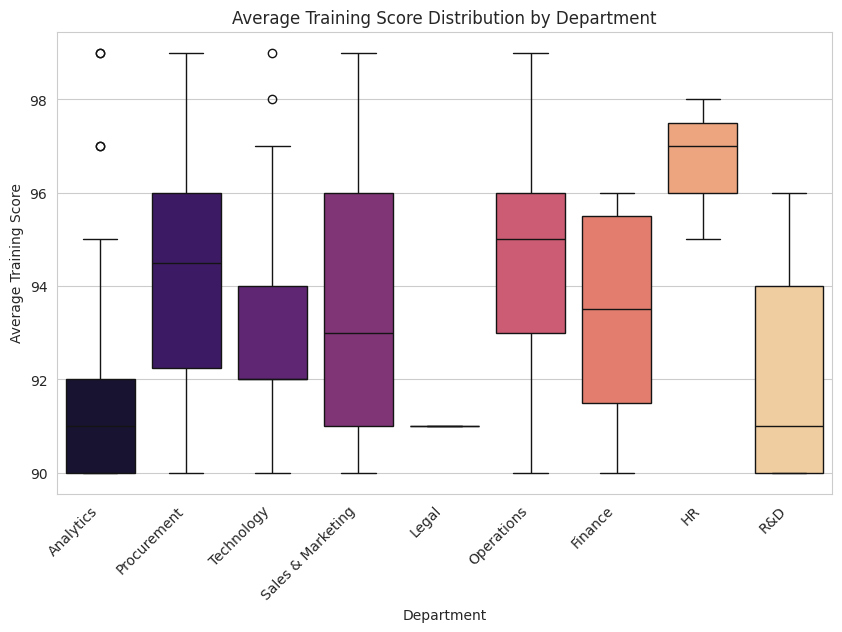

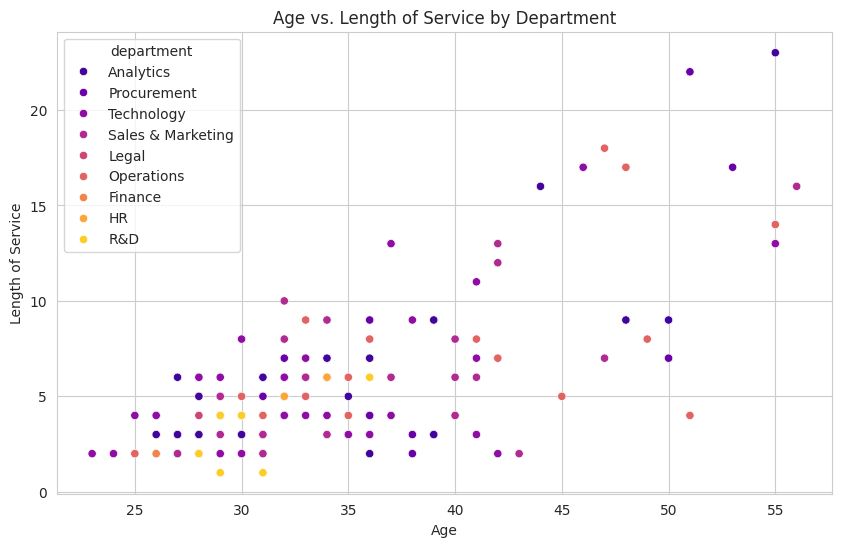

In [23]:
# prompt: Using dataframe selected_employees_data: colourful plots for selected_employees_data

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")


# Create a countplot of departments
plt.figure(figsize=(10, 6))
sns.countplot(x="department", data=selected_employees_data, palette="viridis")
plt.title("Number of Employees per Department")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


# Create a boxplot of average training scores by department
plt.figure(figsize=(10, 6))
sns.boxplot(x="department", y="avg_training_score", data=selected_employees_data, palette="magma")
plt.title("Average Training Score Distribution by Department")
plt.xlabel("Department")
plt.ylabel("Average Training Score")
plt.xticks(rotation=45, ha='right')
plt.show()


# Create a scatter plot of age vs. length of service
plt.figure(figsize=(10, 6))
sns.scatterplot(x="age", y="length_of_service", hue="department", data=selected_employees_data, palette="plasma")
plt.title("Age vs. Length of Service by Department")
plt.xlabel("Age")
plt.ylabel("Length of Service")
plt.show()


They first identify a set of employees based on recommendations/ past performance
Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion
For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.

In [ ]:
# prompt: They first identify a set of employees based on recommendations/ past performance
# Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
# At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion
# For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.

# Assuming 'KPI' column represents KPI completion percentage
eligible_employees = data1[data1['KPI'] > 60]

# Display the eligible employees
#eligible_employees

# You can further filter based on other criteria like training performance, etc., if available in the dataset.
# For example:
eligible_employees = eligible_employees[eligible_employees['Training_Performance'] > 80]

# To save the eligible employees to a new CSV file:
# eligible_employees.to_csv('eligible_candidates.csv', index=False)

In [32]:
data1.size
data1.shape


(23490, 13)

In [24]:
 #prompt: They first identify a set of employees based on recommendations/ past performance

# Assuming 'data1' DataFrame is already loaded as in the provided code.

# Identify employees based on recommendations/past performance (example criteria)
# Replace this with your actual criteria for identifying eligible employees
# For example, you might have a 'recommendation_score' column or some other metric
# Here, let's assume employees with 'previous_year_rating' >= 4 are eligible.

eligible_employees = data1[data1['previous_year_rating'] >= 4]

# Filter for KPI completion greater than 60%
eligible_employees = eligible_employees[eligible_employees['KPIs_met >80%'] > 0.6]


print("Number of initially eligible employees:", len(eligible_employees))
print(eligible_employees.head())

eligible_employees = eligible_employees[eligible_employees['avg_training_score'] >= 70]


# Display the IDs of eligible candidates (assuming 'employee_id' is a column)
print("Eligible Employee IDs:", eligible_employees['employee_id'].tolist())

Number of initially eligible employees: 5003
    employee_id         department     region   education gender  \
6         54542            Finance   region_2  Bachelor's      m   
9         76303         Technology  region_22  Bachelor's      m   
10        60245  Sales & Marketing  region_16  Bachelor's      m   
14        42996         Operations  region_11  Bachelor's      m   
15        12737  Sales & Marketing   region_7  Bachelor's      m   

   recruitment_channel  no_of_trainings  age  previous_year_rating  \
6                other                1   33                   5.0   
9             sourcing                1   29                   5.0   
10            sourcing                2   40                   5.0   
14            sourcing                1   30                   5.0   
15            sourcing                1   31                   4.0   

    length_of_service  KPIs_met >80%  awards_won?  avg_training_score  
6                   3              1            0    

In [33]:
# prompt: save
# eligible_employees  as data3

data3 = eligible_employees
print(data3.head(10))


     employee_id   department     region         education gender  \
9          76303   Technology  region_22        Bachelor's      m   
40         41432    Analytics  region_26        Bachelor's      m   
65         57989  Procurement   region_2        Bachelor's      m   
68         65975    Analytics  region_29        Bachelor's      m   
76            64    Analytics   region_4        Bachelor's      m   
78         10732    Analytics   region_2        Bachelor's      m   
89          2347    Analytics  region_15               NaN      m   
106        36352  Procurement  region_22        Bachelor's      m   
110        40276          R&D  region_22  Master's & above      m   
116         1908    Analytics   region_4  Master's & above      m   

    recruitment_channel  no_of_trainings  age  previous_year_rating  \
9              sourcing                1   29                   5.0   
40             sourcing                1   26                   5.0   
65                other    

In [34]:
data3.to_csv('data3.csv', index=False)

In [35]:
# prompt: remove outliers and duplicate values  from data3

import pandas as pd

# Load the data (assuming 'data3' is already defined as in the previous code)
data3 = pd.read_csv('data3.csv')

# Remove duplicate rows
data3 = data3.drop_duplicates()

# Identify numerical columns for outlier removal
numerical_cols = data3.select_dtypes(include=['number']).columns

# Remove outliers using IQR method (customize thresholds as needed)
for col in numerical_cols:
    Q1 = data3[col].quantile(0.25)
    Q3 = data3[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data3 = data3[(data3[col] >= lower_bound) & (data3[col] <= upper_bound)]

# Reset the index after removing rows
data3 = data3.reset_index(drop=True)

print(data3.head(10))

   employee_id   department     region         education gender  \
0        76303   Technology  region_22        Bachelor's      m   
1        41432    Analytics  region_26        Bachelor's      m   
2        57989  Procurement   region_2        Bachelor's      m   
3           64    Analytics   region_4        Bachelor's      m   
4        10732    Analytics   region_2        Bachelor's      m   
5        36352  Procurement  region_22        Bachelor's      m   
6         1908    Analytics   region_4  Master's & above      m   
7        30607    Analytics  region_22        Bachelor's      m   
8        11774  Procurement  region_20        Bachelor's      f   
9        74965   Technology  region_15        Bachelor's      f   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   29                   5.0   
1            sourcing                1   26                   5.0   
2               other                1   29            

In [40]:
 #prompt: how many outliers are removed

# Load the original data3 (before outlier removal)
data3_original = pd.read_csv('data3.csv')

# Calculate the number of outliers removed
outliers_removed = len(data3_original) - len(data3)

print(f"Number of outliers removed: {outliers_removed}")

Number of outliers removed: 543


##Compare data3,Selected employes  before and after outlier removal

Original data3 statistics:
        employee_id  no_of_trainings          age  previous_year_rating  \
count   1725.000000      1725.000000  1725.000000           1725.000000   
mean   38478.475942         1.264928    34.576232              4.599420   
std    22620.882509         0.608299     7.347097              0.490158   
min       11.000000         1.000000    20.000000              4.000000   
25%    18568.000000         1.000000    30.000000              4.000000   
50%    37972.000000         1.000000    33.000000              5.000000   
75%    57949.000000         1.000000    38.000000              5.000000   
max    78211.000000         9.000000    60.000000              5.000000   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  
count        1725.000000         1725.0  1725.000000         1725.000000  
mean            5.664928            1.0     0.046957           80.747826  
std             3.696924            0.0     0.211607            6.139773

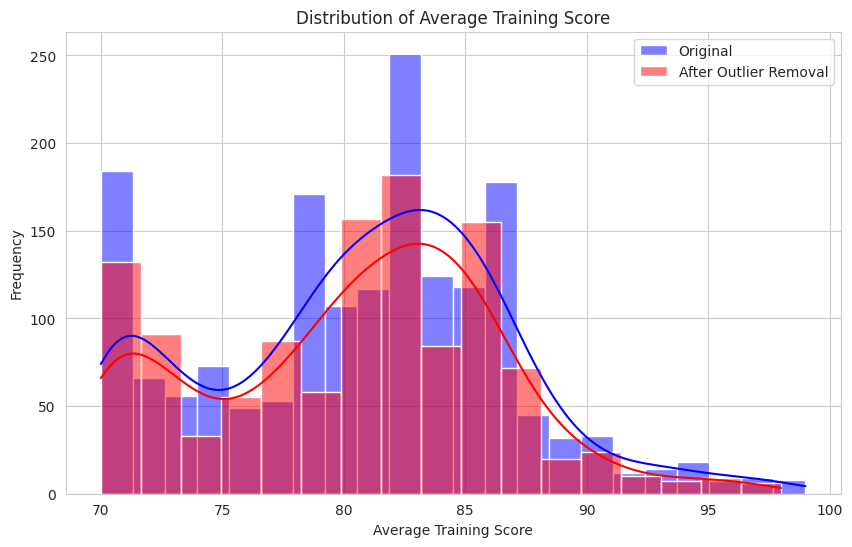

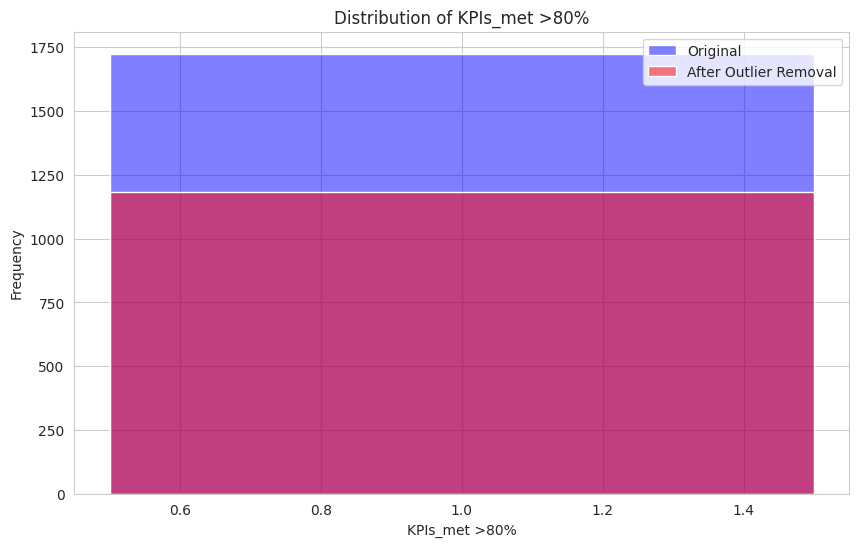

In [39]:


# Compare data3,Selected employes  before and after outlier removal

# Load the original data3 (before outlier removal)
data3_original = pd.read_csv('data3.csv')

# Display some descriptive statistics of the original data
print("Original data3 statistics:")
print(data3_original.describe())


# Load the data3 after outlier removal (assuming the code from the previous response has been executed)
# data3 is already loaded in your provided code snippet, so no need to reload
print("\nData3 statistics after outlier removal:")
print(data3.describe())

# Example comparison: Check the number of rows before and after
print(f"\nNumber of rows before outlier removal: {len(data3_original)}")
print(f"Number of rows after outlier removal: {len(data3)}")


# Visual comparison for specific columns (e.g. 'avg_training_score')
plt.figure(figsize=(10, 6))
sns.histplot(data3_original['avg_training_score'], label='Original', kde=True, color='blue', alpha=0.5)
sns.histplot(data3['avg_training_score'], label='After Outlier Removal', kde=True, color='red', alpha=0.5)

plt.title('Distribution of Average Training Score')
plt.xlabel('Average Training Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#Similarly, you can compare for other numerical column such as  'previous_year_rating', 'no_of_trainings'

# Comparison of KPIs_met >80%
plt.figure(figsize=(10, 6))
sns.histplot(data3_original['KPIs_met >80%'], label='Original', kde=True, color='blue', alpha=0.5)
sns.histplot(data3['KPIs_met >80%'], label='After Outlier Removal', kde=True, color='red', alpha=0.5)

plt.title('Distribution of KPIs_met >80%')
plt.xlabel('KPIs_met >80%')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [51]:
data3.shape

(1725, 13)

In [52]:
# prompt: add a new column name ' promoted '

# Add a new column 'promoted' and initialize it with 'No'
data3['promoted'] = 'No'

# Define a threshold for 'avg_training_score'  (example: 85)
avg_training_score_threshold = 85

# Update 'promoted' to 'Yes' for employees meeting the criteria
data3.loc[data3['avg_training_score'] >= avg_training_score_threshold, 'promoted'] = 'Yes'

# Display the first few rows to verify the changes
print(data3.head())

   employee_id   department     region   education gender recruitment_channel  \
0        76303   Technology  region_22  Bachelor's      m            sourcing   
1        41432    Analytics  region_26  Bachelor's      m            sourcing   
2        57989  Procurement   region_2  Bachelor's      m               other   
3        65975    Analytics  region_29  Bachelor's      m               other   
4           64    Analytics   region_4  Bachelor's      m               other   

   no_of_trainings  age  previous_year_rating  length_of_service  \
0                1   29                   5.0                  2   
1                1   26                   5.0                  4   
2                1   29                   5.0                  2   
3                2   28                   5.0                  4   
4                1   42                   5.0                 11   

   KPIs_met >80%  awards_won?  avg_training_score promoted  
0              1            0              

In [53]:
data3.tail(10 )

employee_id  department     region         education gender  \
1715        29538   Analytics  region_22  Master's & above      f   
1716        21005         R&D  region_22        Bachelor's      f   
1717         7077   Analytics  region_29        Bachelor's      m   
1718        48366  Technology  region_13        Bachelor's      m   
1719        57322         R&D   region_7  Master's & above      m   
1720        16766   Analytics   region_2        Bachelor's      m   
1721        43872  Technology  region_22        Bachelor's      m   
1722        15959   Analytics  region_31        Bachelor's      m   
1723        50134  Technology   region_2        Bachelor's      m   
1724         5973  Technology  region_17  Master's & above      m   

     recruitment_channel  no_of_trainings  age  previous_year_rating  \
1715               other                1   32                   5.0   
1716            sourcing                1   34                   5.0   
1717               other                1   29                   4.0   
1718               other                1   34                   4.0   
1719            sourcing                1   34                   5.0   
1720            sourcing                1   30                   4.0   
1721            sourcing                1   32                   4.0   
1722               other                1   36                   5.0   
1723            referred                2   28                   4.0   
1724               other                3   40                   5.0   

      length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
1715                  5              1            0                  82   
1716                  5              1            0                  84   
1717                  3              1            0                  86   
1718                  6              1            0                  78   
1719                  2              1            0                  89   
1720                  6              1            0                  86   
1721                  2              1            0                  83   
1722                  7              1            0                  86   
1723                  6              1            0                  79   
1724                  5              1            0                  89   

     promoted  
1715       No  
1716       No  
1717      Yes  
1718       No  
1719      Yes  
1720      Yes  
1721       No  
1722      Yes  
1723       No  
1724      Yes

In [54]:
# prompt: submission file

submission_df = data3[['employee_id', 'promoted']].copy()

# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

In [55]:
submission= pd.read_csv("/content/submission.csv")
submission

employee_id promoted
0           76303       No
1           41432      Yes
2           57989       No
3           65975       No
4              64       No
...           ...      ...
1720        16766      Yes
1721        43872       No
1722        15959      Yes
1723        50134       No
1724         5973      Yes

[1725 rows x 2 columns]

#Test data Analysis

In [42]:
data2= pd.read_csv("/content/test_2umaH9m.csv")
data2

employee_id         department     region         education gender  \
0             8724         Technology  region_26        Bachelor's      m   
1            74430                 HR   region_4        Bachelor's      f   
2            72255  Sales & Marketing  region_13        Bachelor's      m   
3            38562        Procurement   region_2        Bachelor's      f   
4            64486            Finance  region_29        Bachelor's      m   
...            ...                ...        ...               ...    ...   
23485        53478              Legal   region_2   Below Secondary      m   
23486        25600         Technology  region_25        Bachelor's      m   
23487        45409                 HR  region_16        Bachelor's      f   
23488         1186        Procurement  region_31        Bachelor's      m   
23489         5973         Technology  region_17  Master's & above      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
0                sourcing                1   24                   NaN   
1                   other                1   31                   3.0   
2                   other                1   31                   1.0   
3                   other                3   31                   2.0   
4                sourcing                1   30                   4.0   
...                   ...              ...  ...                   ...   
23485            sourcing                1   24                   3.0   
23486            sourcing                1   31                   3.0   
23487            sourcing                1   26                   4.0   
23488            sourcing                3   27                   NaN   
23489               other                3   40                   5.0   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  
0                      1              1            0                  77  
1                      5              0            0                  51  
2                      4              0            0                  47  
3                      9              0            0                  65  
4                      7              0            0                  61  
...                  ...            ...          ...                 ...  
23485                  1              0            0                  61  
23486                  7              0            0                  74  
23487                  4              0            0                  50  
23488                  1              0            0                  70  
23489                  5              1            0                  89  

[23490 rows x 13 columns]

In [46]:
# prompt: train and test on data3

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # Example model, choose appropriately
from sklearn.metrics import accuracy_score  # Example metric, choose appropriately

# Load the preprocessed data3
data3 = pd.read_csv('data3.csv')

# Define features (X) and target variable (y)
# Replace 'target_column' with the actual name of your target variable column
X = data3.drop('avg_training_score', axis=1)
y = data3['avg_training_score']


# Convert non-numerical columns to numerical representations (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)


# Handle potential missing values (if any)
X = X.fillna(X.mean()) # example for filling missing numerical value


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size and random_state

# Initialize and train the model (example using Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.0463768115942029


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
# prompt: find the best trained models for data3

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier # Example: RandomForest
from sklearn.svm import SVC # Example: Support Vector Classifier


# Load the preprocessed data3
data3 = pd.read_csv('data3.csv')

# Define features (X) and target variable (y)
X = data3.drop('avg_training_score', axis=1)
y = data3['avg_training_score']

# Convert non-numerical columns to numerical representations (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# Handle potential missing values (if any)
X = X.fillna(X.mean())

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate a model
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


# Train and evaluate multiple models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42), # Example: RandomForest
    "Support Vector Classifier": SVC(random_state=42)  # Example: SVC
    # Add more models here
}

results = {}
for name, model in models.items():
    accuracy = train_and_evaluate(model, X_train, X_test, y_train, y_test)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy}")

# Find the best model
best_model = max(results, key=results.get)
print(f"\nBest Model: {best_model} with accuracy: {results[best_model]}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.0463768115942029
Random Forest Accuracy: 0.15942028985507245
Support Vector Classifier Accuracy: 0.04927536231884058

Best Model: Random Forest with accuracy: 0.15942028985507245


##Modeling data1
##Logistic Regression: Best Score = 0.15942028985507245, Best Params = {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

##Random Forest: Best Score = 0.15652173913043477, Best Params = {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 50}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB
None
        employee_id  no_of_trainings           age  previou

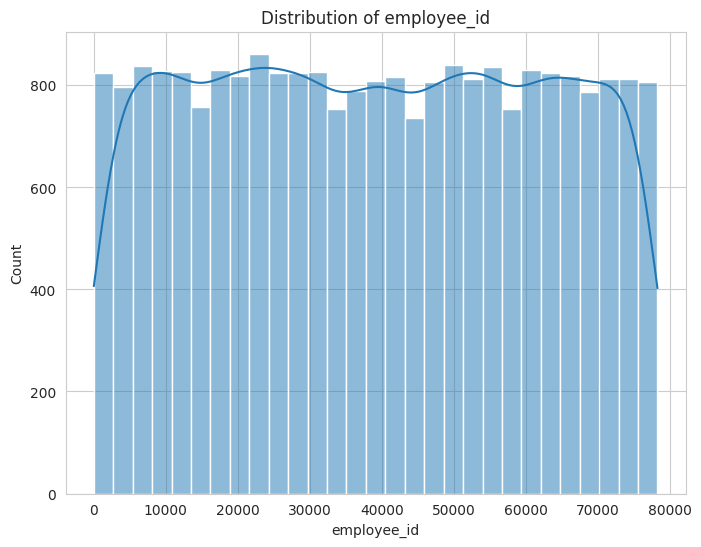

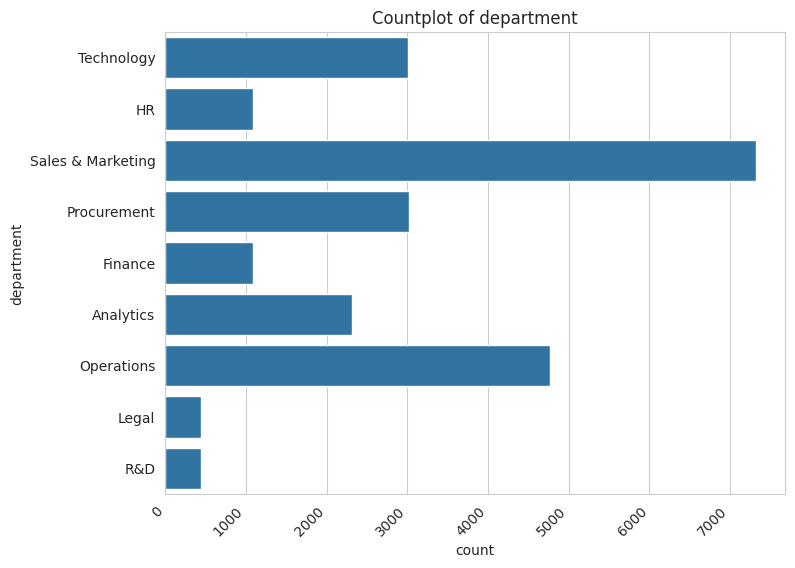

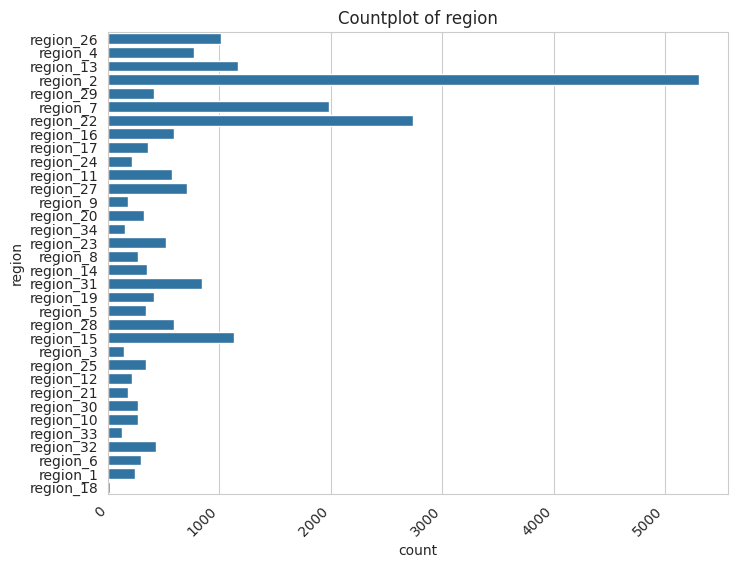

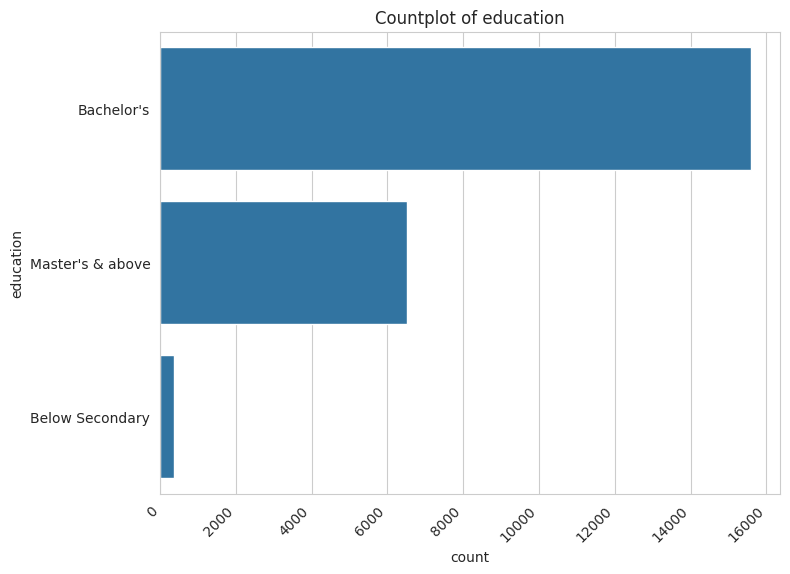

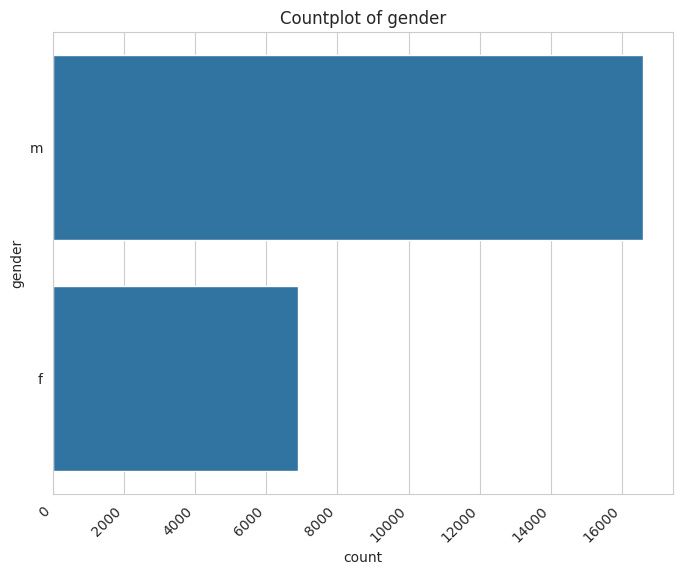

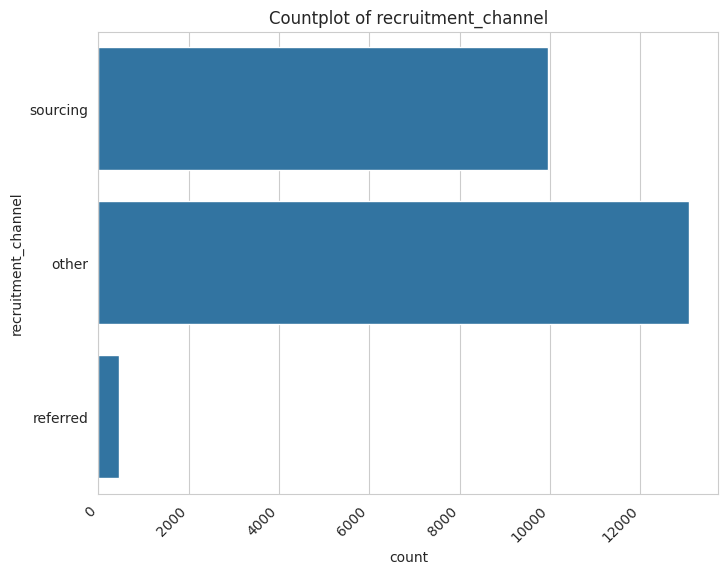

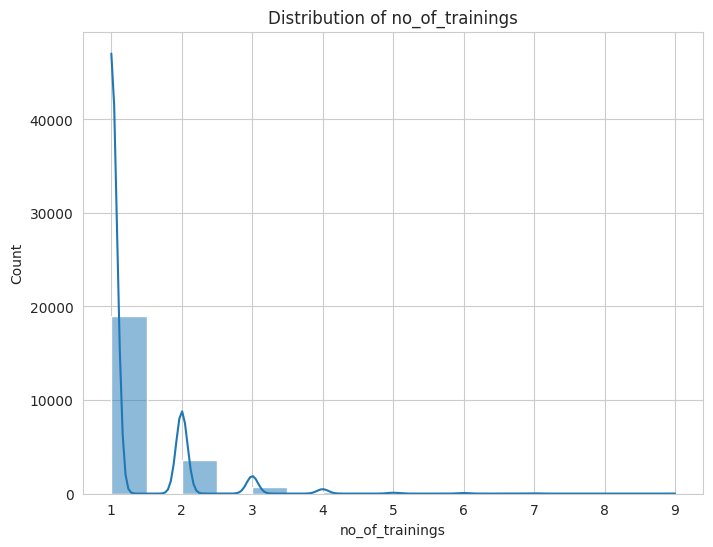

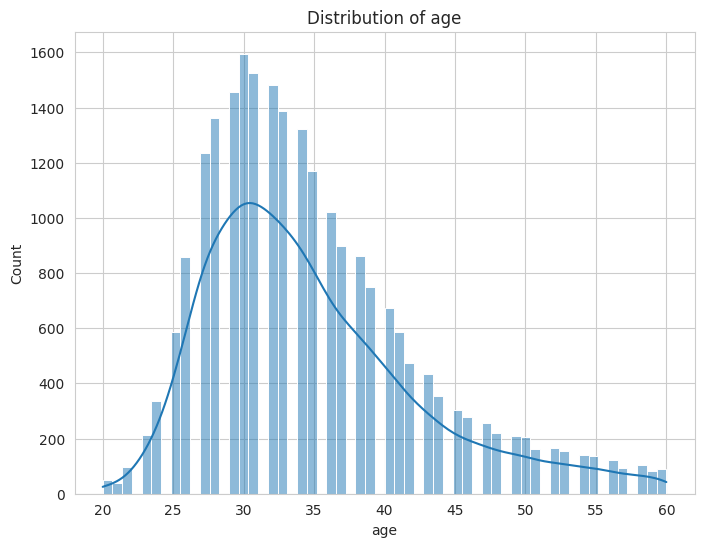

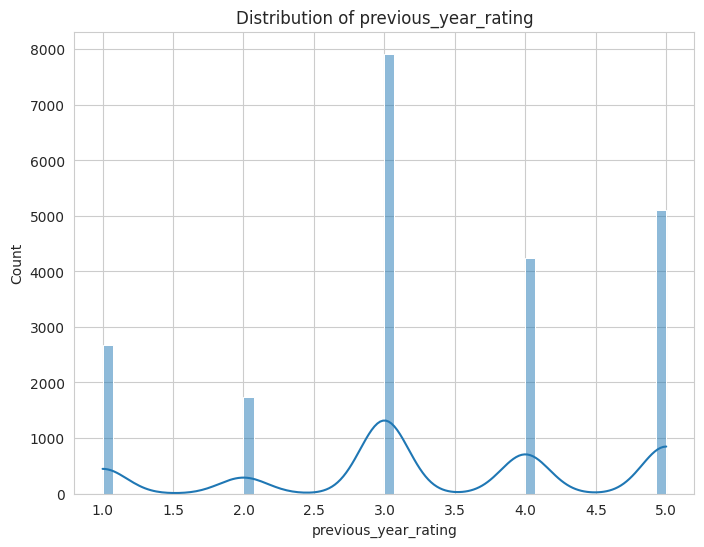

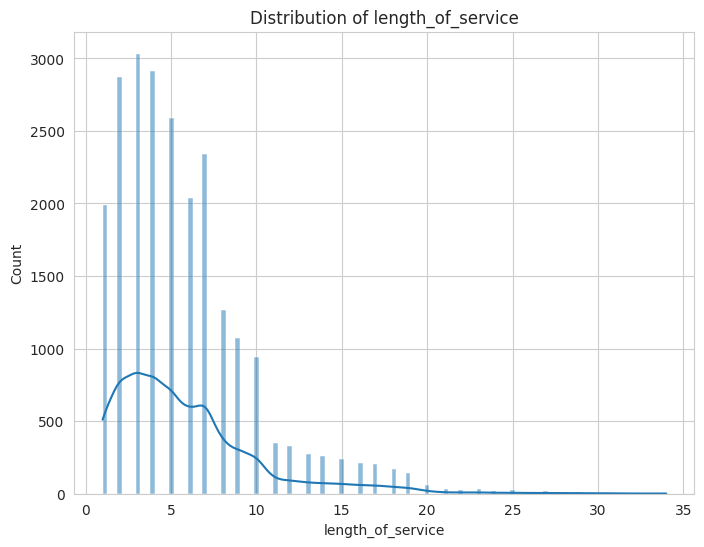

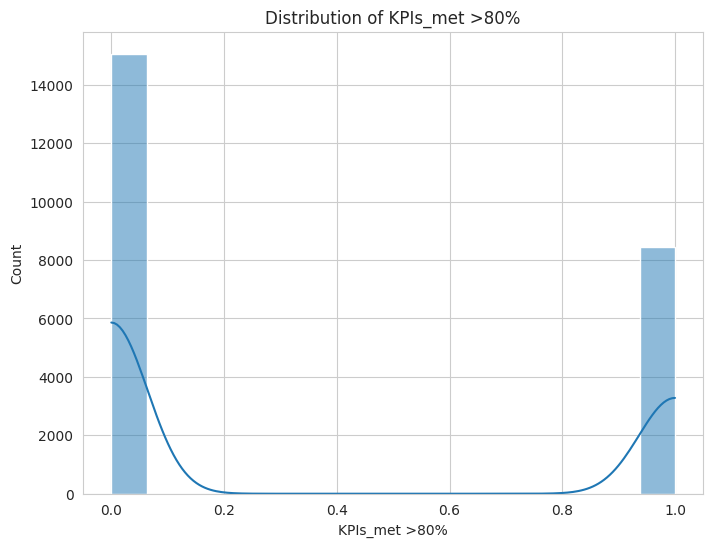

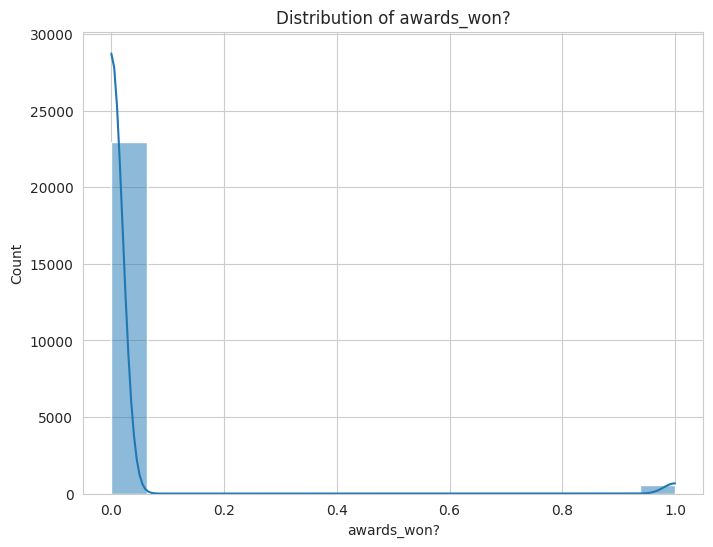

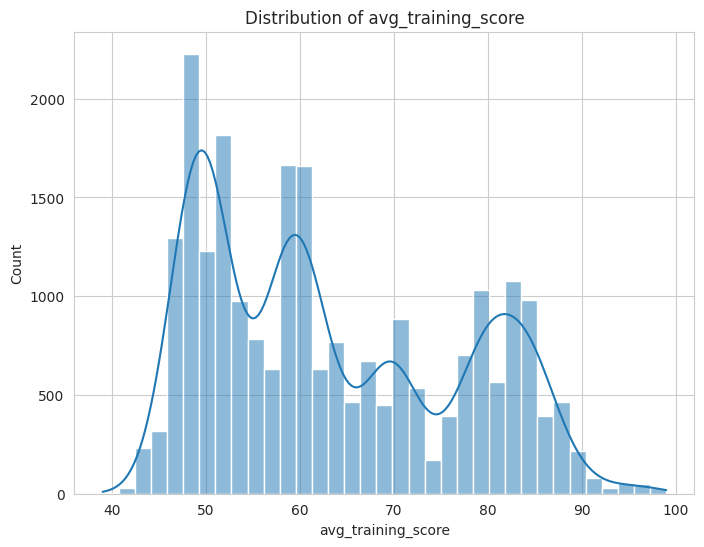

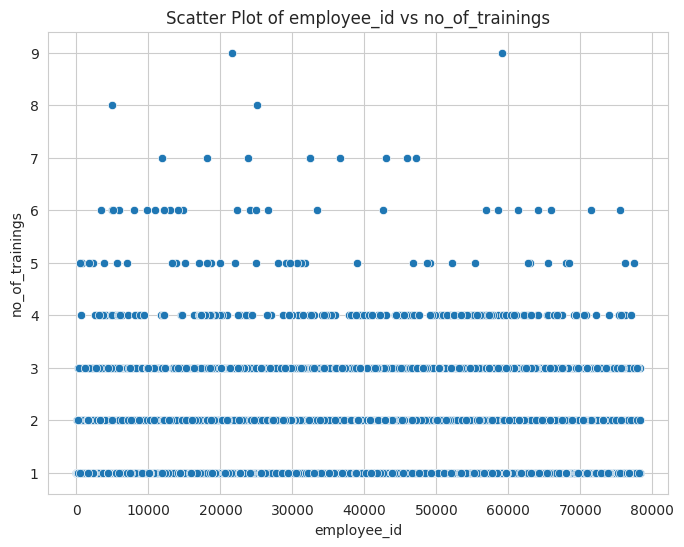

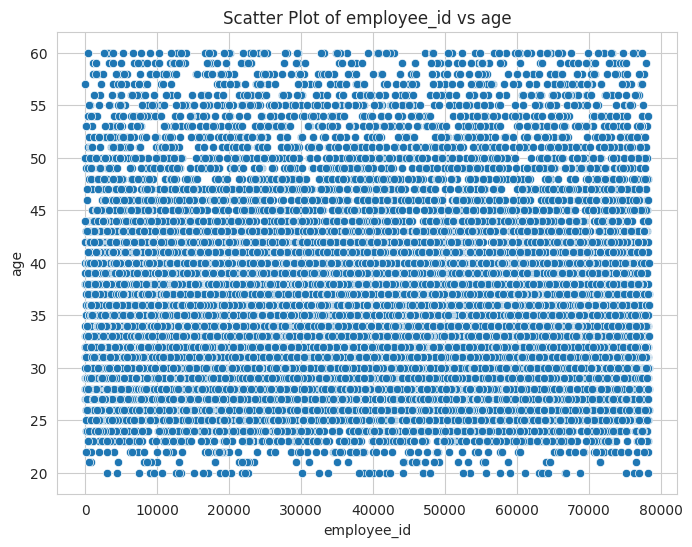

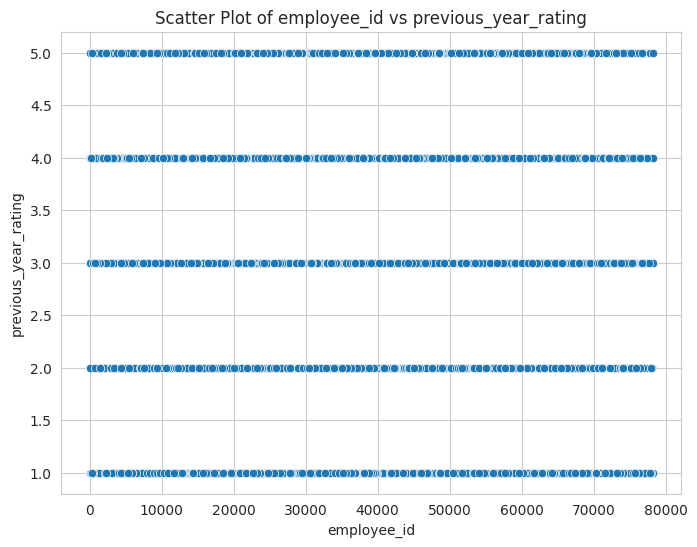

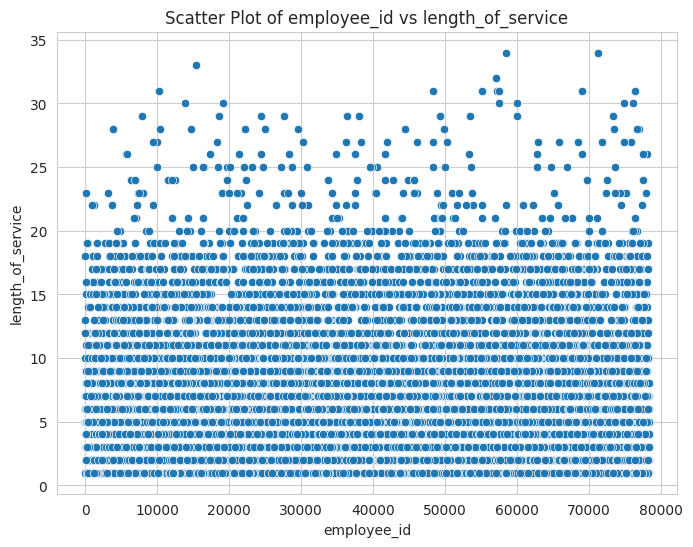

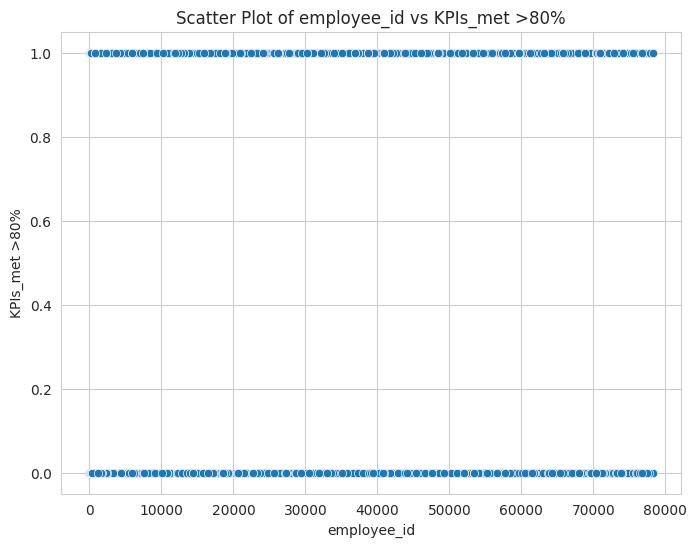

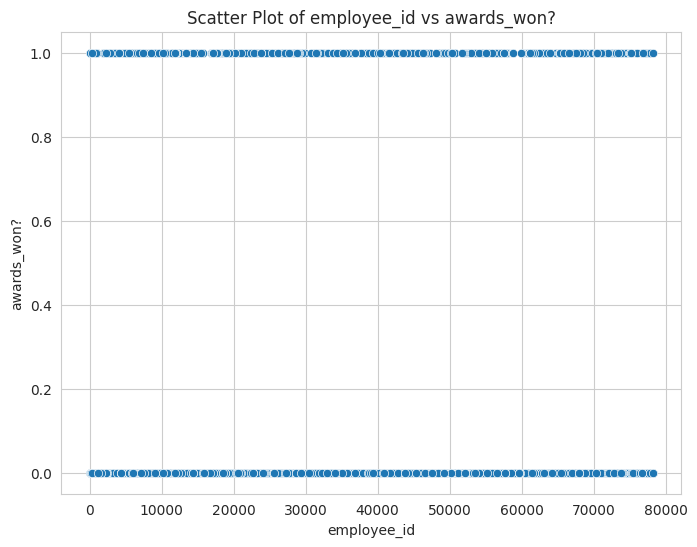

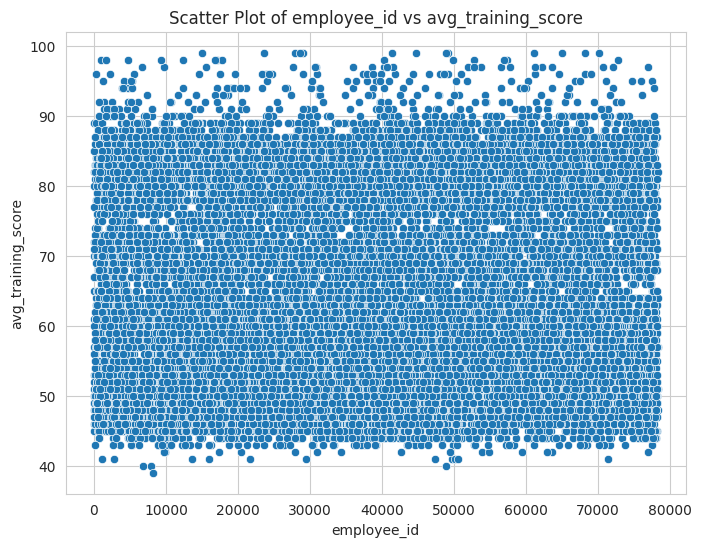

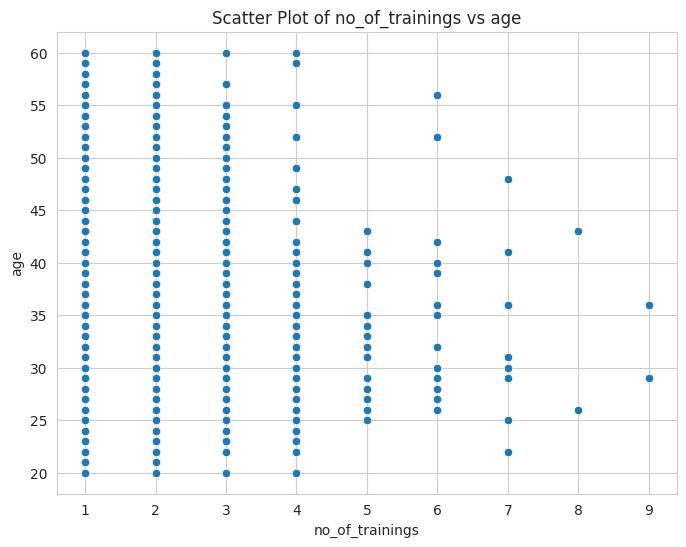

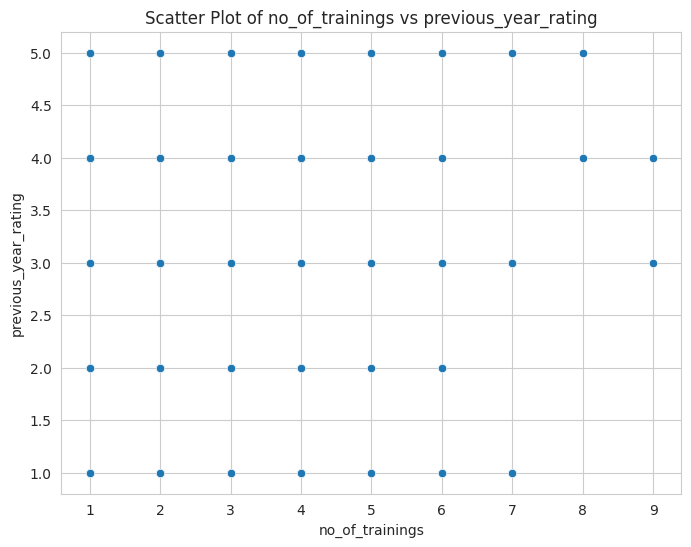

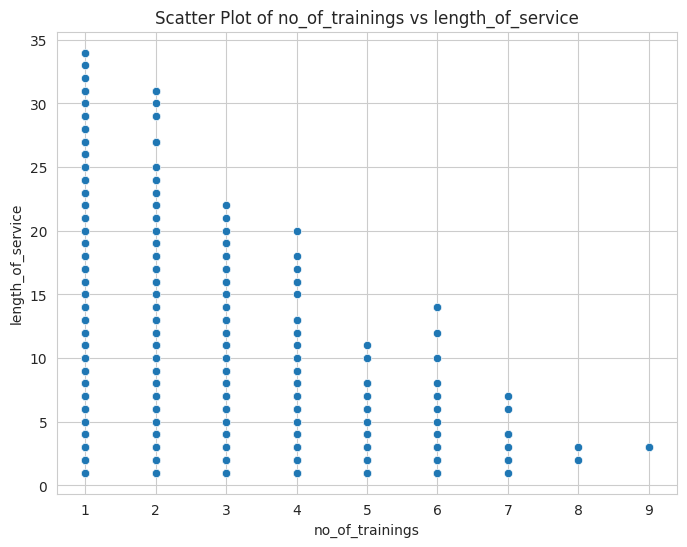

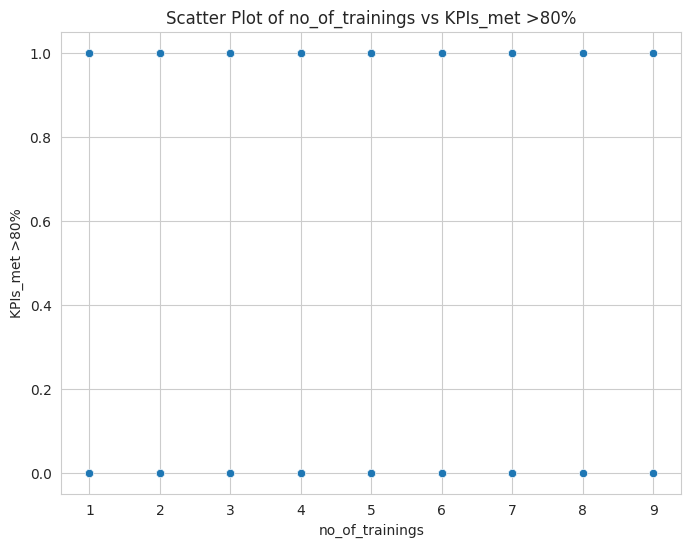

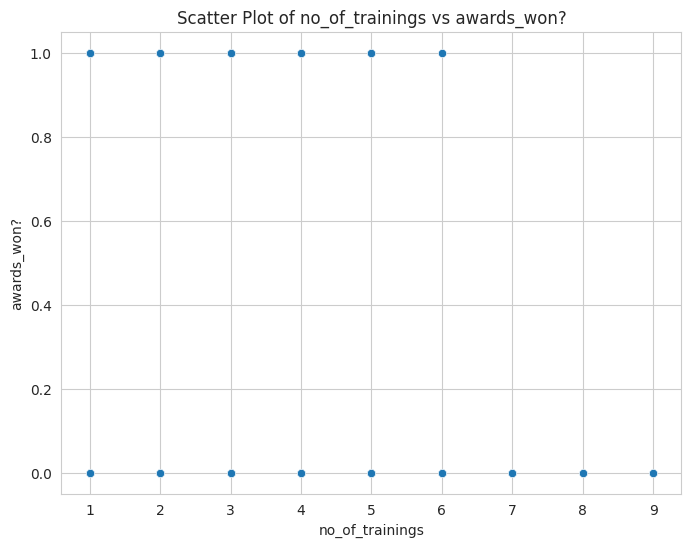

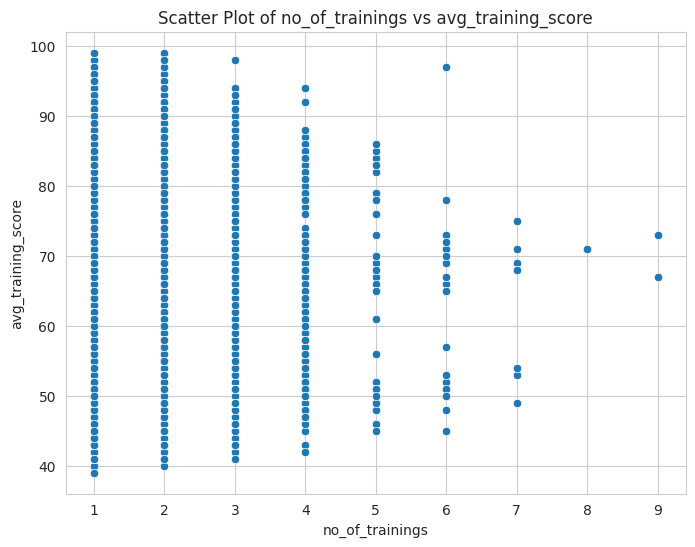

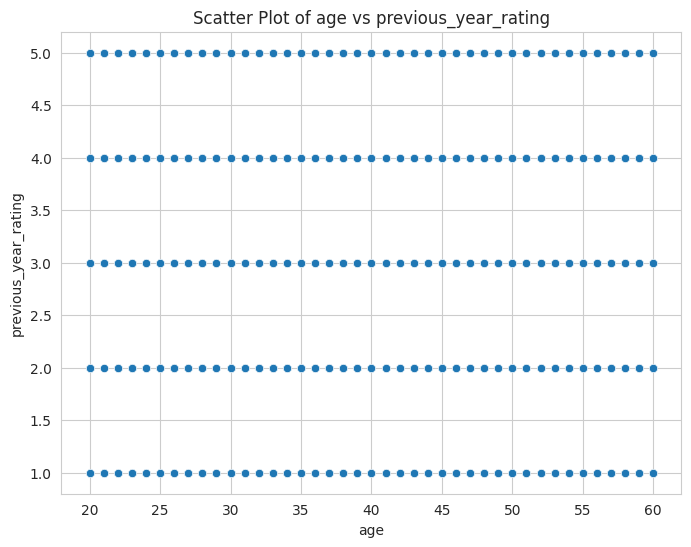

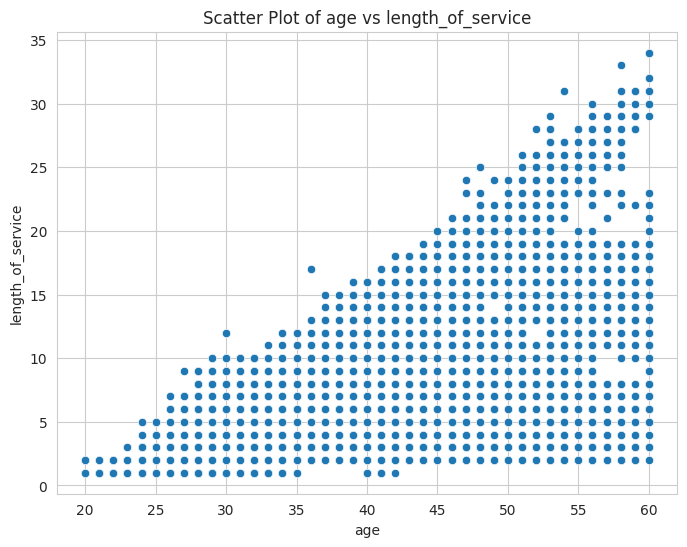

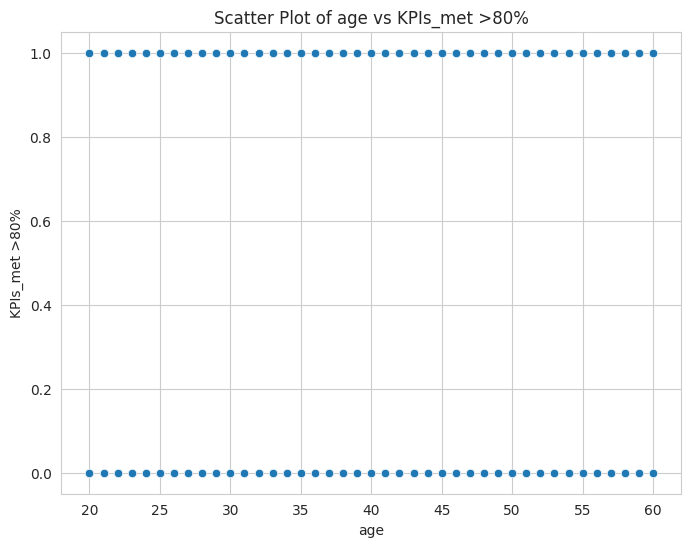

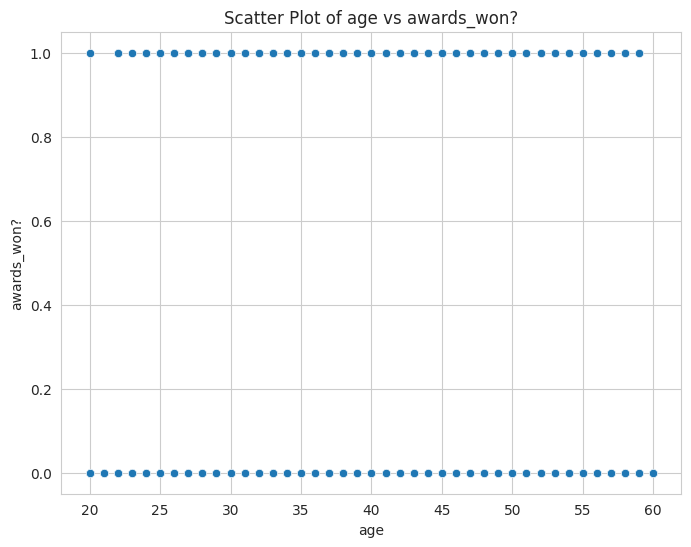

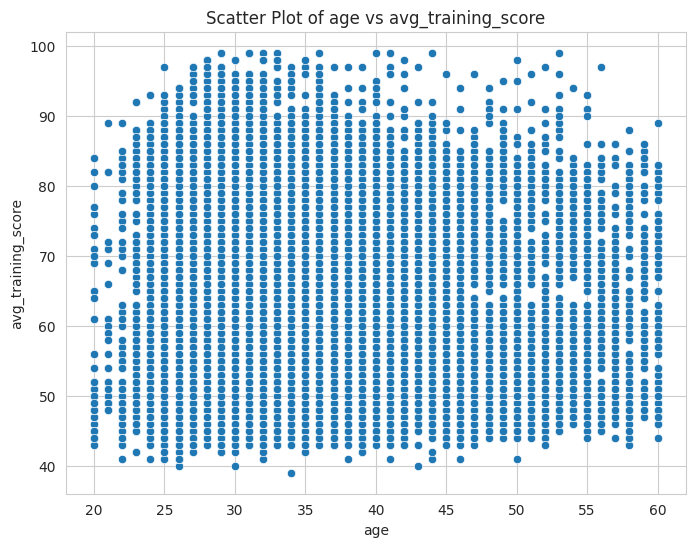

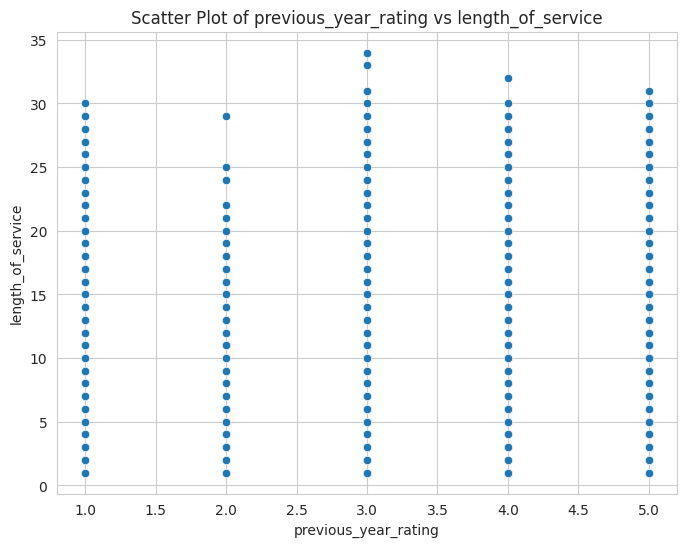

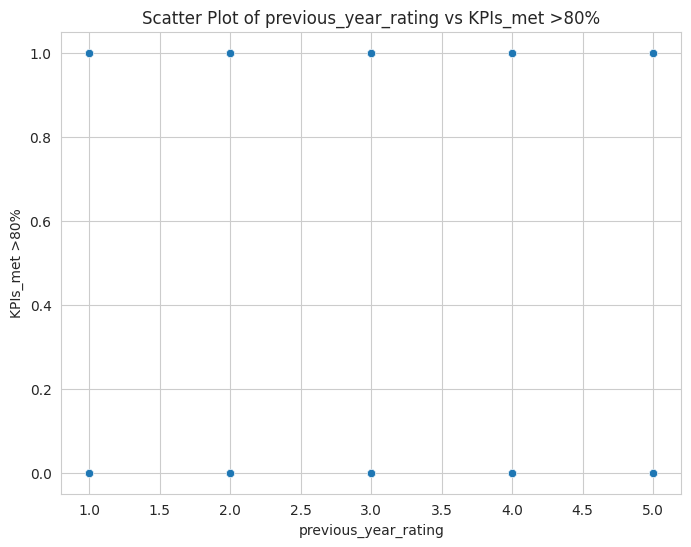

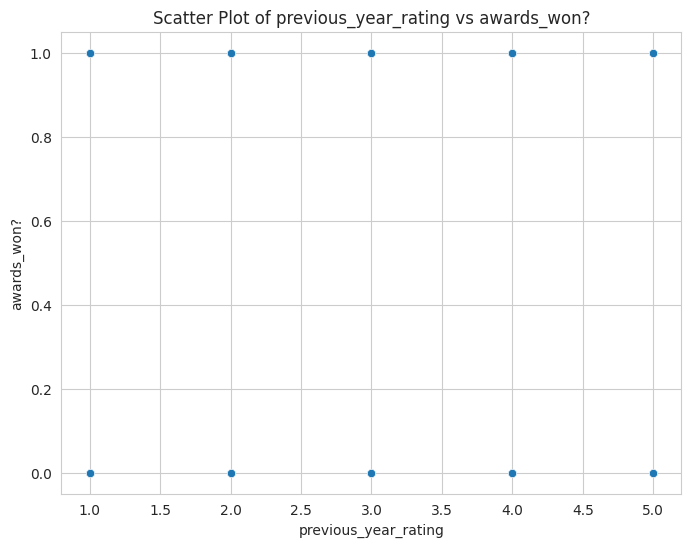

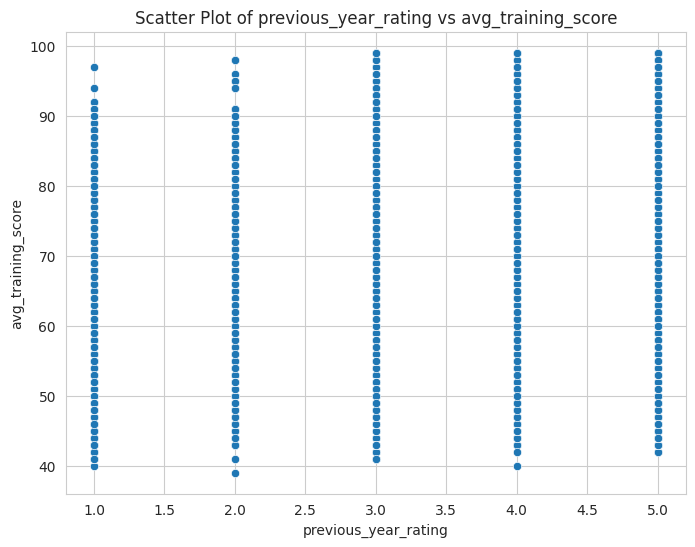

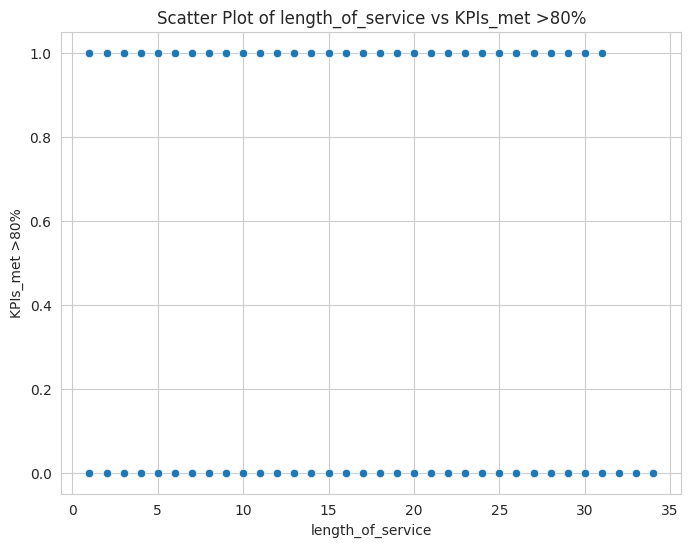

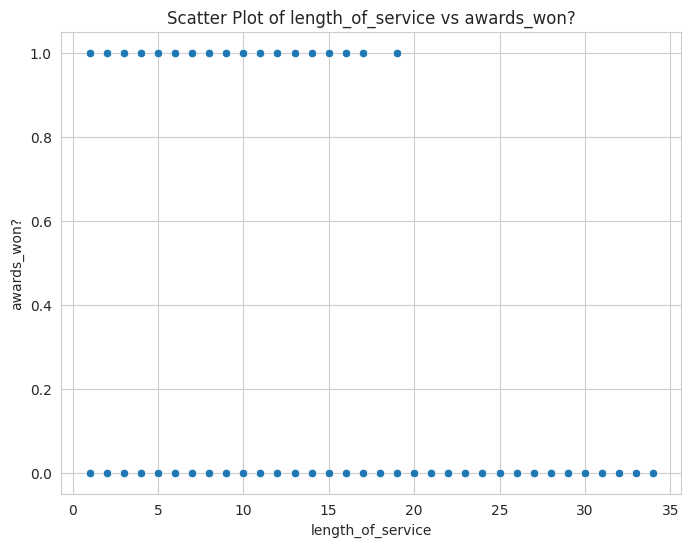

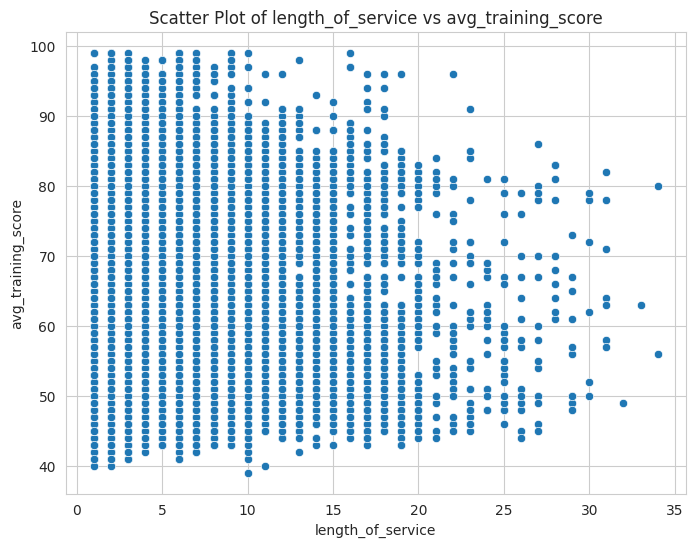

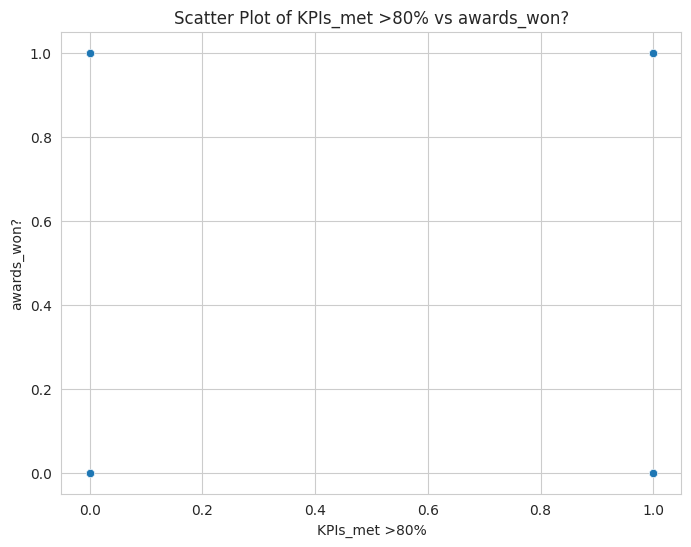

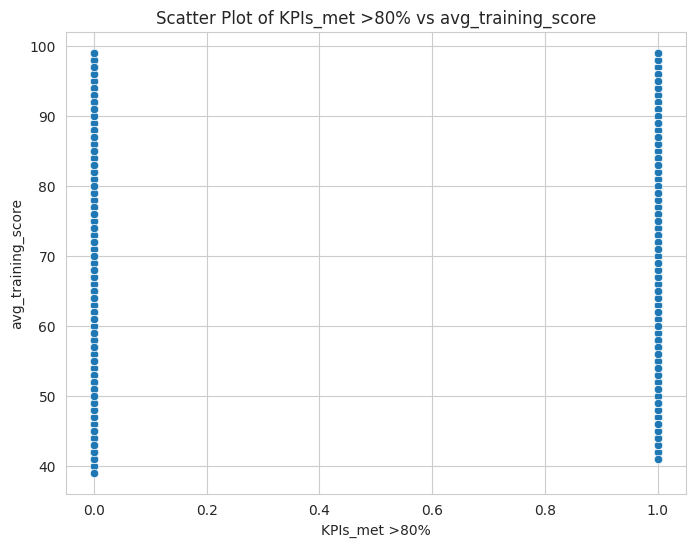

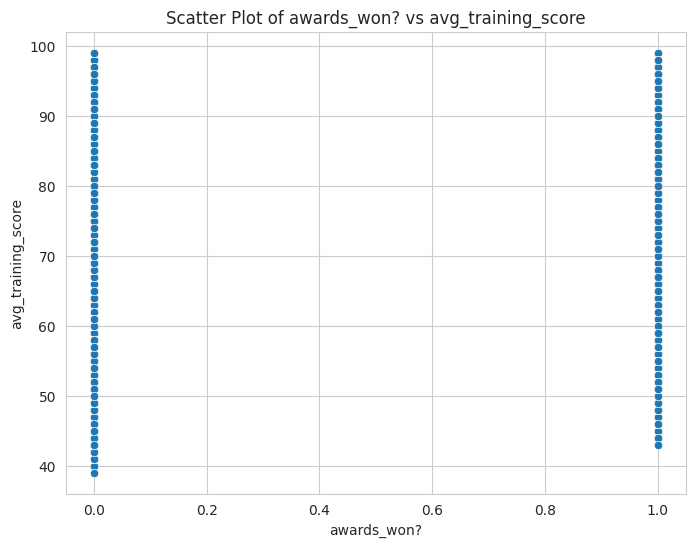

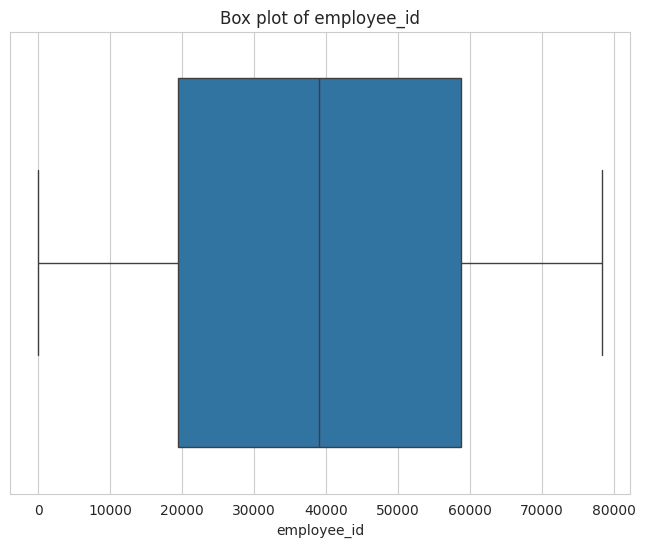

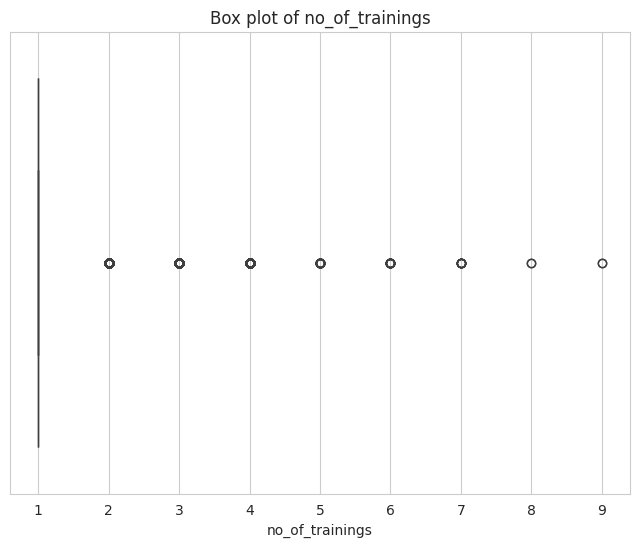

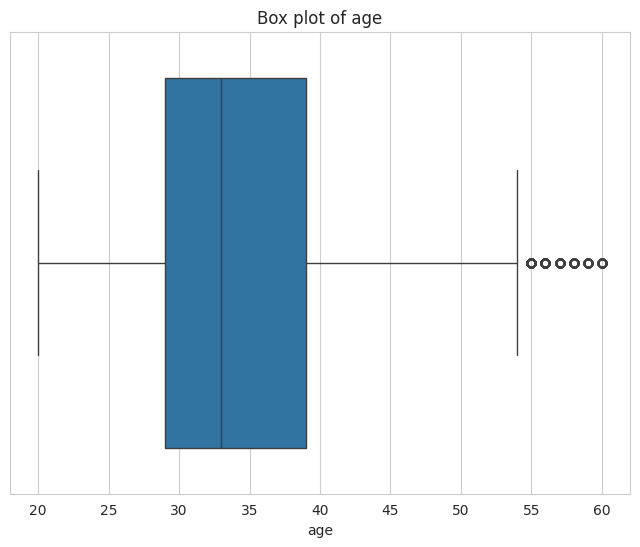

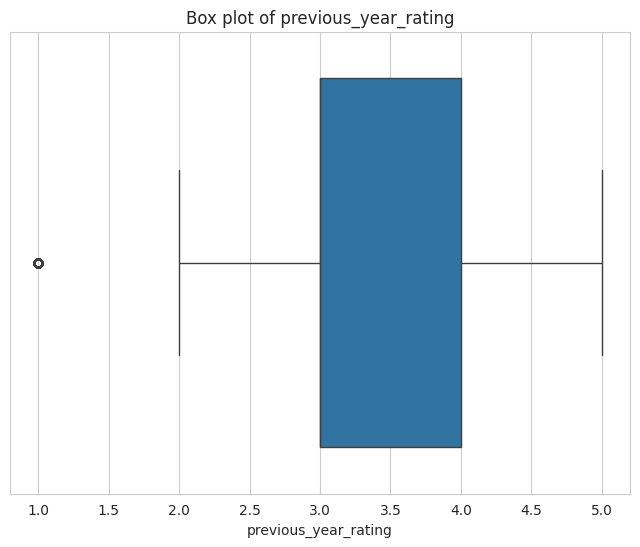

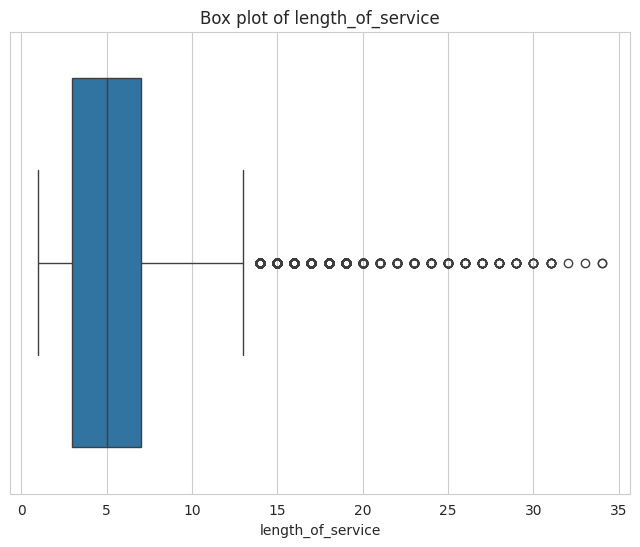

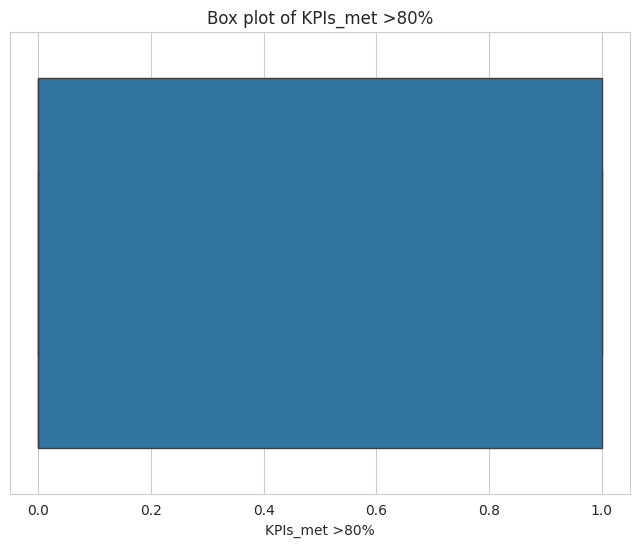

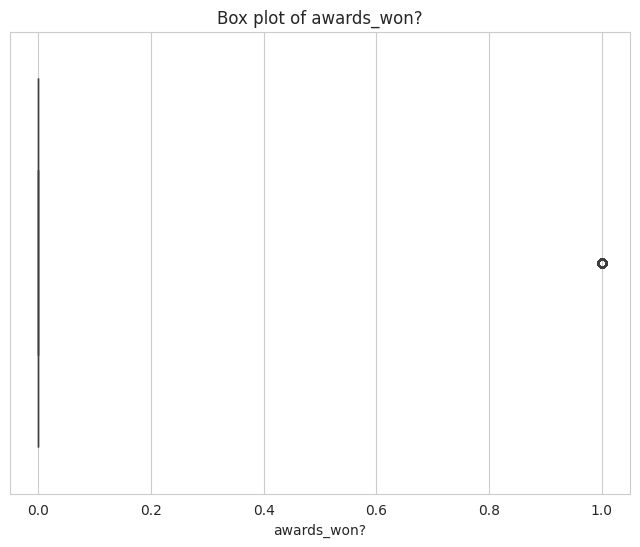

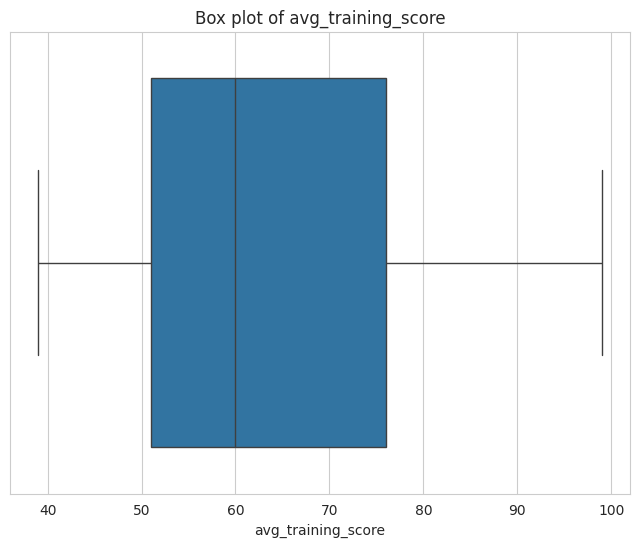

Unique values in column 'employee_id':
[ 8724 74430 72255 ... 45409  1186  5973]
--------------------
Unique values in column 'department':
['Technology' 'HR' 'Sales & Marketing' 'Procurement' 'Finance' 'Analytics'
 'Operations' 'Legal' 'R&D']
--------------------
Unique values in column 'region':
['region_26' 'region_4' 'region_13' 'region_2' 'region_29' 'region_7'
 'region_22' 'region_16' 'region_17' 'region_24' 'region_11' 'region_27'
 'region_9' 'region_20' 'region_34' 'region_23' 'region_8' 'region_14'
 'region_31' 'region_19' 'region_5' 'region_28' 'region_15' 'region_3'
 'region_25' 'region_12' 'region_21' 'region_30' 'region_10' 'region_33'
 'region_32' 'region_6' 'region_1' 'region_18']
--------------------
Unique values in column 'education':
["Bachelor's" "Master's & above" nan 'Below Secondary']
--------------------
Unique values in column 'gender':
['m' 'f']
--------------------
Unique values in column 'recruitment_channel':
['sourcing' 'other' 'referred']
----------------

In [43]:
# prompt: eda on data2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic information about the dataset
print(data2.info())
print(data2.describe())

# Check for missing values
print(data2.isnull().sum())

# Visualize data distributions
for column in data2.columns:
  if pd.api.types.is_numeric_dtype(data2[column]):
    plt.figure(figsize=(8, 6))
    sns.histplot(data2[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()
  else:
    plt.figure(figsize=(8, 6))
    sns.countplot(data2[column])
    plt.title(f'Countplot of {column}')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.show()

# Explore relationships between variables (example with scatter plot for numerical variables)
numerical_cols = data2.select_dtypes(include=np.number).columns
for i in range(len(numerical_cols)):
    for j in range(i+1, len(numerical_cols)):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=data2[numerical_cols[i]], y=data2[numerical_cols[j]])
        plt.title(f'Scatter Plot of {numerical_cols[i]} vs {numerical_cols[j]}')
        plt.show()

# Box plots to visualize the distribution of numerical data and identify outliers
for col in numerical_cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=data2[col])
    plt.title(f"Box plot of {col}")
    plt.show()

for col in data2.columns:
  print(f"Unique values in column '{col}':")
  print(data2[col].unique())
  print("-" * 20)

#Test data done in another file , due to running error